# HOUSE PRICE PREDICTION SYSTEM  USING MACHINE LEARNING

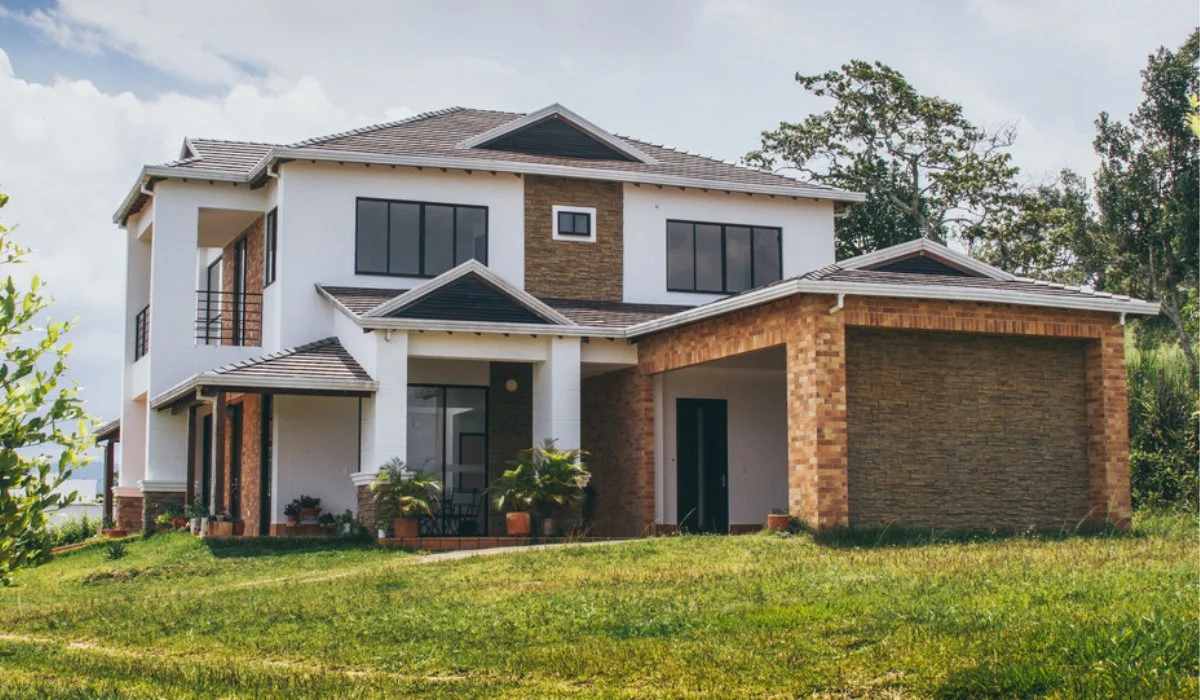

# üìù Project Objective:

1. The aim of this project is to train a Machine Learning Model which can predict the House Sale Price using various relevant features.

2. This project is completely based for House Prices - Advanced Regression Techniques Kaggle Competition.

3. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges us to predict the final price of each home.
4. Dataset Link:-  to get the Dataset

# üåü Business Understanding:

1. In the dynamic real estate market, the significance of accurate house price predictions is increasing significantly, as they have the potential to empower homeowners, buyers, and real estate professionals by providing valuable insights into property values and facilitating informed decision-making.

2. As a result, the real estate industry faces the crucial task of determining the appropriate pricing for houses before listing them on the market. This is achieved through a comprehensive analysis of various property attributes such as location, size, amenities, condition, market trends, and more.

3. Analyzing house attributes to determine pricing helps the real estate industry strike a balance between fair market value for sellers and affordability for buyers. It ensures that house prices align with their unique characteristics, desirability, and overall value proposition. This approach also fosters transparency and facilitates fair competition among properties, allowing buyers to make well-informed decisions based on their specific needs, preferences, and budget constraints. Moreover, accurate house price predictions enable homeowners to assess their property's worth and make informed choices regarding selling, refinancing, or investment opportunities.


# <b>üåüABOUT THE DATASET:</b>
    Here's a brief version of what you'll find in the data description file.
    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property -
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property -
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: (Dollar) Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

# IMPORTING LIBRARIES

In [296]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [297]:
train=pd.read_csv("train.csv")

In [298]:
test=pd.read_csv("test.csv")

In [299]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [300]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [301]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [303]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [304]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Combining Both Train And Test Columns For Further Processing 

# Basic Understanding Of Data

In [305]:
df=train.append(test)

In [306]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [307]:
df.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1449  2910         180       RM         21.0     1470   Pave   NaN      Reg   
1450  2911         160       RM         21.0     1484   Pave   NaN      Reg   
1451  2912          20       RL         80.0    13384   Pave   NaN      Reg   
1452  2913         160       RM         21.0     1533   Pave   NaN      Reg   
1453  2914         160       RM         21.0     1526   Pave   NaN      Reg   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1451         Lvl    AllPub    Inside       Mod      Mitchel       Norm   
1452         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1453         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1449       Norm    Twnhs     SFoyer            4            6       1970   
1450       Norm   TwnhsE     2Story            4            4       1972   
1451       Norm     1Fam     1Story            5            5       1969   
1452       Norm    Twnhs     2Story            4            5       1970   
1453       Norm    Twnhs     2Story            4            5       1970   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1449          1970     Gable  CompShg     CemntBd     CmentBd       None   
1450          1972     Gable  CompShg     CemntBd     CmentBd       None   
1451          1979     Gable  CompShg     Plywood     Plywood    BrkFace   
1452          1970     Gable  CompShg     CemntBd     CmentBd       None   
1453          1970     Gable  CompShg     CemntBd     CmentBd       None   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1449         0.0        TA        TA     CBlock       Gd       TA   
1450         0.0        TA        TA     CBlock       TA       TA   
1451       194.0        TA        TA      PConc       TA       TA   
1452         0.0        TA        TA     CBlock       TA       TA   
1453         0.0        TA        TA     CBlock       TA       TA   
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA  

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [309]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [310]:
df.describe(include=object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      2915   2919   198     2919        2919      2917      2919   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       2265   2907   120     1859        2622      2916      2133   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       2919         2919       2919       2919     2919       2919   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        2778          443       2511       2889     2425       1471   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       2919     2919        2918        2918       2895      2919   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        2310     2876        1025        1014       1742      1798   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       2919       2919     2838     2837         2837         2840   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        2538       1308     1283     2606         1904          851   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          2839    2919      2919       2919       2918        2918   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           2493    2874      1493       2723       2671        1492   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        2917        1499       2762         2760       2760       2760   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         2717         744       1723         1230       2604       2654   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        2919     10    571         105     2918          2919  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         2641      4    329          95     2525          2402

In [311]:
df.shape

(2919, 81)

In [312]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [313]:
df.duplicated().sum()/len(df)*100

0.0

In [314]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Droping of ireelevant features

In [315]:
df.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True)

In [316]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [317]:
df.shape

(2919, 75)

In [318]:
for i in df:
    print(i,"---",df[i].dtype,"==",df[i].nunique())

MSSubClass --- int64 == 16
MSZoning --- object == 5
LotFrontage --- float64 == 128
LotArea --- int64 == 1951
Street --- object == 2
LotShape --- object == 4
LandContour --- object == 4
Utilities --- object == 2
LotConfig --- object == 5
LandSlope --- object == 3
Neighborhood --- object == 25
Condition1 --- object == 9
Condition2 --- object == 8
BldgType --- object == 5
HouseStyle --- object == 8
OverallQual --- int64 == 10
OverallCond --- int64 == 9
YearBuilt --- int64 == 118
YearRemodAdd --- int64 == 61
RoofStyle --- object == 6
RoofMatl --- object == 8
Exterior1st --- object == 15
Exterior2nd --- object == 16
MasVnrType --- object == 4
MasVnrArea --- float64 == 444
ExterQual --- object == 4
ExterCond --- object == 5
Foundation --- object == 6
BsmtQual --- object == 4
BsmtCond --- object == 4
BsmtExposure --- object == 4
BsmtFinType1 --- object == 6
BsmtFinSF1 --- float64 == 991
BsmtFinType2 --- object == 6
BsmtFinSF2 --- float64 == 272
BsmtUnfSF --- float64 == 1135
TotalBsmtSF --- fl

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

# SEPRATING NUMERIC AND CATEGORICAL COLUMNS

In [320]:
num=["int64","float64"]
num=df.select_dtypes(include=num)
num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0

In [321]:
cat=['object']
cat=df.select_dtypes(include=object)
cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [322]:
num.shape

(2919, 37)

In [323]:
cat.shape

(2919, 38)

# Handling numerical data

In [324]:
num.isnull().sum()/len(df)*100

MSSubClass        0.000000
LotFrontage      16.649538
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.787941
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.447071
GarageCars        0.034258
GarageArea        0.034258
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice        49.982871
d

# Filling Null values in num data

In [325]:
num['LotFrontage']=num['LotFrontage'].fillna(num['LotFrontage'].median())

In [326]:
num['MasVnrArea']=num['MasVnrArea'].fillna(num['MasVnrArea'].median())

In [327]:
num['BsmtFinSF1']=num['BsmtFinSF1'].fillna(num['BsmtFinSF1'].median())

In [328]:
num['BsmtFinSF2']=num['BsmtFinSF2'].fillna(num['BsmtFinSF2'].median())

In [329]:
num['BsmtUnfSF']=num['BsmtUnfSF'].fillna(num['BsmtUnfSF'].median())

In [330]:
num['TotalBsmtSF']=num['TotalBsmtSF'].fillna(num['TotalBsmtSF'].median())

In [331]:
num['BsmtFullBath']=num['BsmtFullBath'].fillna(num['BsmtFullBath'].median())

In [332]:
num['BsmtHalfBath']=num['BsmtHalfBath'].fillna(num['BsmtHalfBath'].median())

In [333]:
num['GarageYrBlt']=num['GarageYrBlt'].fillna(num['GarageYrBlt'].median())

In [334]:
num['GarageCars']=num['GarageCars'].fillna(num['GarageCars'].median())

In [335]:
num['GarageArea']=num['GarageArea'].fillna(num['GarageArea'].median())

In [337]:
num.isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

Dropping irrelevent features from num data

In [338]:
num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0

In [339]:
num.drop(columns=['BsmtFinSF2','LowQualFinSF','BsmtFullBath','GarageYrBlt','BsmtHalfBath','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','MiscVal','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MoSold'],inplace=True)

In [340]:
num.isnull().sum()

MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
PoolArea           0
YrSold             0
SalePrice       1459
dtype: int64

In [341]:
num.shape

(2919, 23)

# Handling Categorical data

In [342]:
cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

Dropping irrelevent data from cat

In [343]:
cat.drop(columns=['GarageQual','LotConfig',"GarageFinish","MasVnrType","Exterior1st","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","LandSlope","Condition2","BldgType"],inplace=True)

In [344]:
cat.head()

MSZoning Street LotShape LandContour Utilities Neighborhood Condition1  \
0       RL   Pave      Reg         Lvl    AllPub      CollgCr       Norm   
1       RL   Pave      Reg         Lvl    AllPub      Veenker      Feedr   
2       RL   Pave      IR1         Lvl    AllPub      CollgCr       Norm   
3       RL   Pave      IR1         Lvl    AllPub      Crawfor       Norm   
4       RL   Pave      IR1         Lvl    AllPub      NoRidge       Norm   

  HouseStyle RoofStyle RoofMatl Exterior2nd ExterQual ExterCond Foundation  \
0     2Story     Gable  CompShg     VinylSd        Gd        TA      PConc   
1     1Story     Gable  CompShg     MetalSd        TA        TA     CBlock   
2     2Story     Gable  CompShg     VinylSd        Gd        TA      PConc   
3     2Story     Gable  CompShg     Wd Shng        TA        TA     BrkTil   
4     2Story     Gable  CompShg     VinylSd        Gd        TA      PConc   

  BsmtQual HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
0       Gd        Ex          Y      SBrkr          Gd        Typ     Attchd   
1       Gd        Ex          Y      SBrkr          TA        Typ     Attchd   
2       Gd        Ex          Y      SBrkr          Gd        Typ     Attchd   
3       TA        Gd          Y      SBrkr          Gd        Typ     Detchd   
4       Gd        Ex          Y      SBrkr          Gd        Typ     Attchd   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [345]:
cat.shape

(2919, 25)

In [346]:
cat.isnull().sum()

MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
Neighborhood       0
Condition1         0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior2nd        1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

# Filling null Values in categorical data data

In [347]:
for column in cat.columns:
    if cat[column].dtype=='object':
        cat[column]=cat[column].fillna(cat[column].mode()[0])

In [348]:
print('Missing values in Cat data:', cat.isnull().sum().sum())

Missing values in Cat data: 0


In [349]:
cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# concatination of both num and cat data

In [350]:
df=pd.concat([num,cat],axis=1)

In [351]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          2003       196.0        856.0       856       854       1710   
1          1976         0.0       1262.0      1262         0       1262   
2          2002       162.0        920.0       920       866       1786   
3          1970         0.0        756.0       961       756       1717   
4          2000       350.0       1145.0      1145      1053       2198   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  PoolArea  YrSold  SalePrice MSZoning Street  \
0         2.0       548.0         0    2008   208500.0       RL   Pave   
1         2.0       460.0         0    2007   181500.0       RL   Pave   
2         2.0       608.0         0    2008   223500.0       RL   Pave   
3         3.0       642.0         0    2006   140000.0       RL   Pave   
4         3.0       836.0         0    2008   250000.0       RL   Pave   

  LotShape LandContour Utilities Neighborhood Condition1 HouseStyle RoofStyle  \
0      Reg         Lvl    AllPub      CollgCr       Norm     2Story     Gable   
1      Reg         Lvl    AllPub      Veenker      Feedr     1Story     Gable   
2      IR1         Lvl    AllPub      CollgCr       Norm     2Story     Gable   
3      IR1         Lvl    AllPub      Crawfor       Norm     2Story     Gable   
4      IR1         Lvl    AllPub      NoRidge       Norm     2Story     Gable   

  RoofMatl Exterior2nd ExterQual ExterCond Foundation BsmtQual HeatingQC  \
0  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   
1  CompShg     MetalSd        TA        TA     CBlock       Gd        Ex   
2  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   
3  CompShg     Wd Shng        TA        TA     BrkTil       TA        Gd   
4  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageCond  \
0          Y      SBrkr          Gd        Typ     Attchd         TA   
1          Y      SBrkr          TA        Typ     Attchd         TA   
2          Y      SBrkr          Gd        Typ     Attchd         TA   
3          Y      SBrkr          Gd        Typ     Detchd         TA   
4          Y      SBrkr          Gd        Typ     Attchd         TA   

  PavedDrive SaleType SaleCondition  
0          Y       WD        Normal  
1          Y       WD        Normal  
2          Y       WD        Normal  
3          Y       WD       Abnorml  
4          Y       WD        Normal

In [352]:
df.shape

(2919, 48)

# EXPLORATORY DATA ANALYSIS

# VISULALIZING Numerical Features

VISULALIZING TARGET VARIABLE (SALEPRICE):

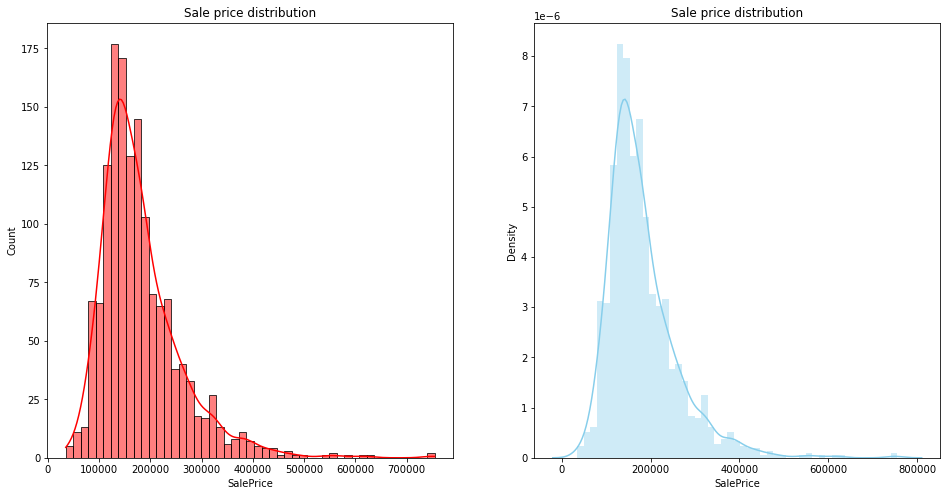

In [353]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Sale price distribution")
sns.histplot(df['SalePrice'],color='red',kde=True)

plt.subplot(1,2,2)
plt.title("Sale price distribution")
sns.distplot(df['SalePrice'],color='skyblue');

observation:
    
    most of the sale price of houses lied between 100000 to 250000
    Highest price of the house is 755000.0

In [354]:
df[df['SalePrice']>600000]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
691           60        104.0    21535           10            6       1994   
898           20        100.0    12919            9            5       2009   
1169          60        118.0    35760           10            5       1995   
1182          60        160.0    15623           10            5       1996   

      YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
691           1995      1170.0       2444.0      2444      1872       4316   
898           2010       760.0       2330.0      2364         0       2364   
1169          1996      1378.0       1930.0      1831      1796       3627   
1182          1996         0.0       2396.0      2411      2065       4476   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
691          3         1             4             1            10   
898          2         1             2             1            11   
1169         3         1             4             1            10   
1182         3         1             4             1            10   

      Fireplaces  GarageCars  GarageArea  PoolArea  YrSold  SalePrice  \
691            2         3.0       832.0         0    2007   755000.0   
898            2         3.0       820.0         0    2010   611657.0   
1169           1         3.0       807.0         0    2006   625000.0   
1182           2         3.0       813.0       555    2007   745000.0   

     MSZoning Street LotShape LandContour Utilities Neighborhood Condition1  \
691        RL   Pave      IR1         Lvl    AllPub      NoRidge       Norm   
898        RL   Pave      IR1         Lvl    AllPub      NridgHt       Norm   
1169       RL   Pave      IR1         Lvl    AllPub      NoRidge       Norm   
1182       RL   Pave      IR1         Lvl    AllPub      NoRidge       Norm   

     HouseStyle RoofStyle RoofMatl Exterior2nd ExterQual ExterCond Foundation  \
691      2Story     Gable  WdShngl     HdBoard        Ex        TA      PConc   
898      1Story       Hip  CompShg     VinylSd        Ex        TA      PConc   
1169     2Story       Hip  CompShg     HdBoard        Gd        Gd      PConc   
1182     2Story       Hip  CompShg     ImStucc        Gd        TA      PConc   

     BsmtQual HeatingQC CentralAir Electrical KitchenQual Functional  \
691        Ex        Ex          Y      SBrkr          Ex        Typ   
898        Ex        Ex          Y      SBrkr          Ex        Typ   
1169       Ex        Ex          Y      SBrkr          Gd        Typ   
1182       Ex        Ex          Y      SBrkr          Ex        Typ   

     GarageType GarageCond PavedDrive SaleType SaleCondition  
691      Attchd         TA          Y       WD        Normal  
898      Attchd         TA          Y      New       Partial  
1169     Attchd         TA          Y       WD        Normal  
1182     Attchd         TA          Y       WD       Abnorml

Viualizing OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

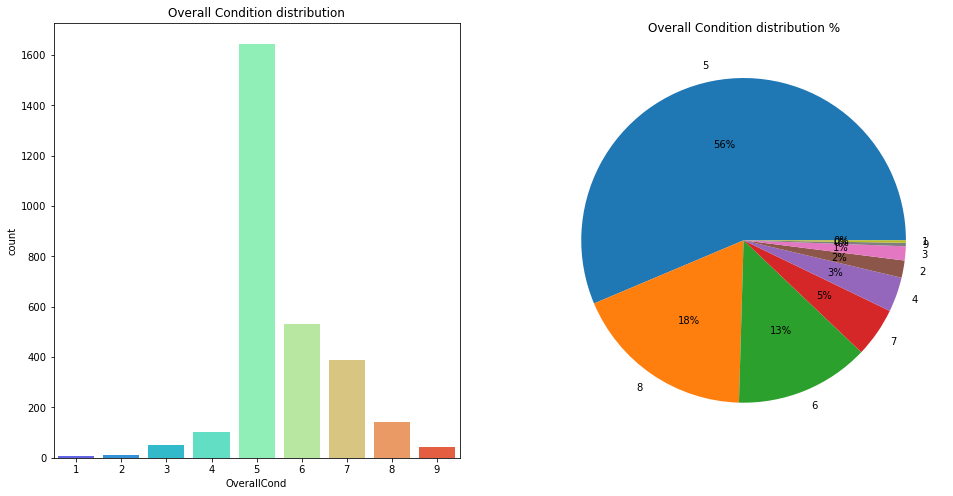

In [355]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Overall Condition distribution")
sns.countplot(df['OverallCond'],palette='rainbow',data=df)

plt.subplot(1,2,2)
plt.title("Overall Condition distribution %")
plt.pie(df['OverallCond'].value_counts(),labels=df['OverallCond'].unique(),autopct='%0.0f%%',data=df);

observation:
    
    most demandable houses conditions is 5,6,7
    Around 0.5% of the houses have Very Excellent overall condition
    Most of the houses Around 56% of the houses have Average overall condition 


<AxesSubplot:title={'center':'Overall Condition distribution as per Average Sale Price'}, xlabel='OverallCond', ylabel='SalePrice'>

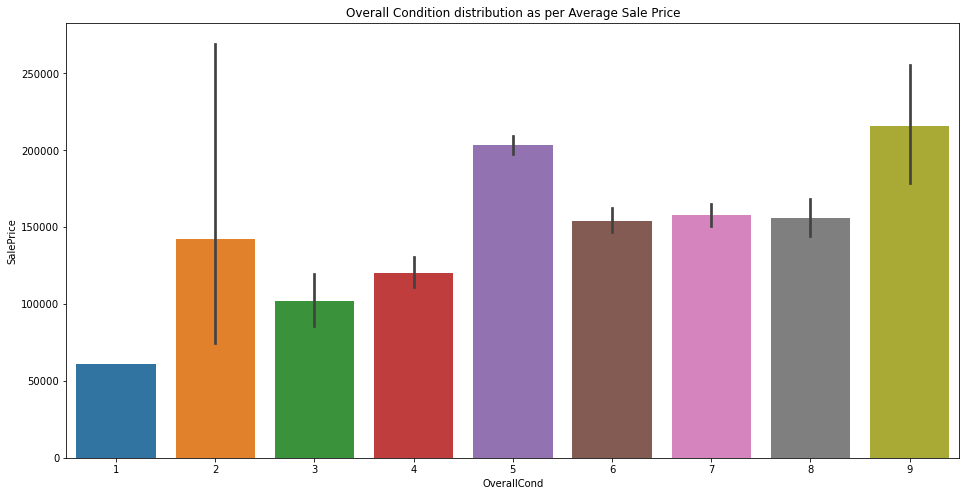

In [356]:
plt.figure(figsize=(16,8))
plt.title("Overall Condition distribution as per Average Sale Price")
sns.barplot(df['OverallCond'],df['SalePrice'])

Observation:
    
    Average price for Excellent overall condition house is High

Viualizing OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

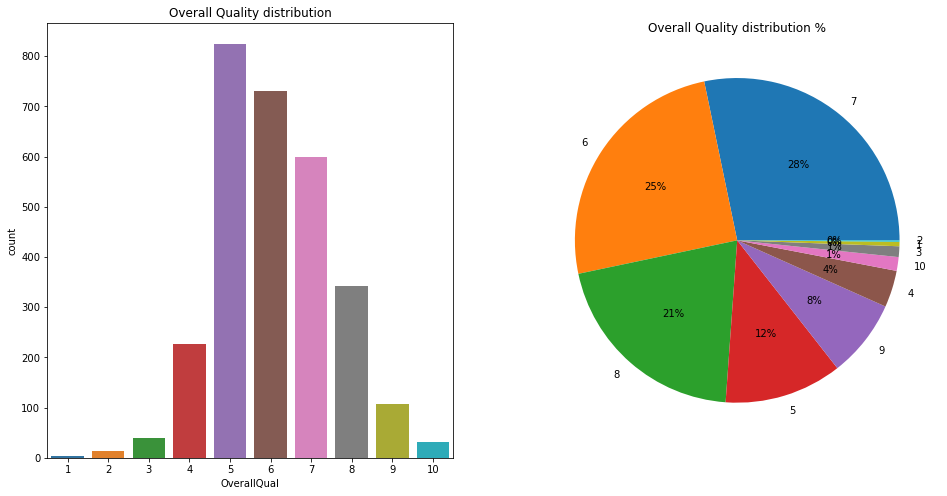

In [357]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Overall Quality distribution")
sns.countplot(df['OverallQual'],data=df)

plt.subplot(1,2,2)
plt.title("Overall Quality distribution %")
plt.pie(df['OverallQual'].value_counts(),labels=df['OverallQual'].unique(),autopct='%0.0f%%',data=df);

observation:

    most demandable houses quality is 5,6,7
    Around 1% of the houses have Very Excellent overall Quality
    Most of the houses Around 28% of the houses have Average overall Quality


<AxesSubplot:title={'center':'Overall Quality distribution as per Average Sale Price'}, xlabel='OverallQual', ylabel='SalePrice'>

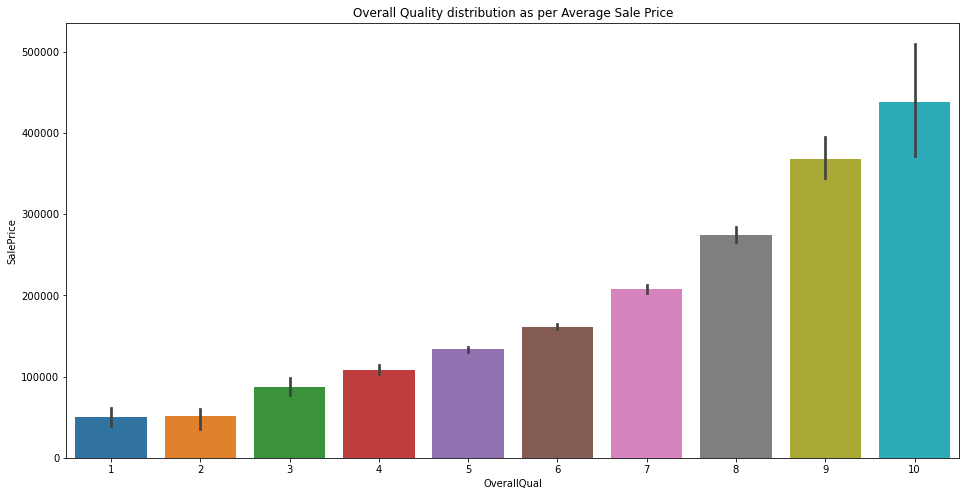

In [358]:
plt.figure(figsize=(16,8))
plt.title("Overall Quality distribution as per Average Sale Price")
sns.barplot(df['OverallQual'],df['SalePrice'])

Visualizing  Year Built :

In [359]:
df['YearBuilt'].value_counts().head()

2005    142
2006    138
2007    109
2004     99
2003     88
Name: YearBuilt, dtype: int64

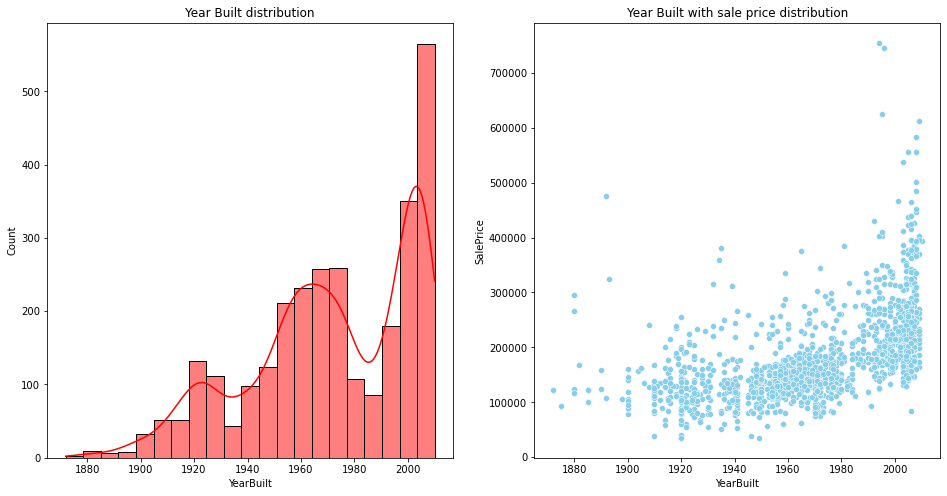

In [360]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Year Built distribution")
sns.histplot(df['YearBuilt'],color='red',kde=True)


plt.subplot(1,2,2)
plt.title("Year Built with sale price distribution")
sns.scatterplot(df['YearBuilt'],df['SalePrice'],color='skyblue');

observations:

    year with most of houses built is 2005 with 142 houses
    most of the houses built between year (1950 to 1970) and (2003 to 2007)

visualizing YearRemodAdd : house remodeled

In [361]:
df['YearRemodAdd'].value_counts().head()

1950    361
2006    202
2007    164
2005    141
2004    111
Name: YearRemodAdd, dtype: int64

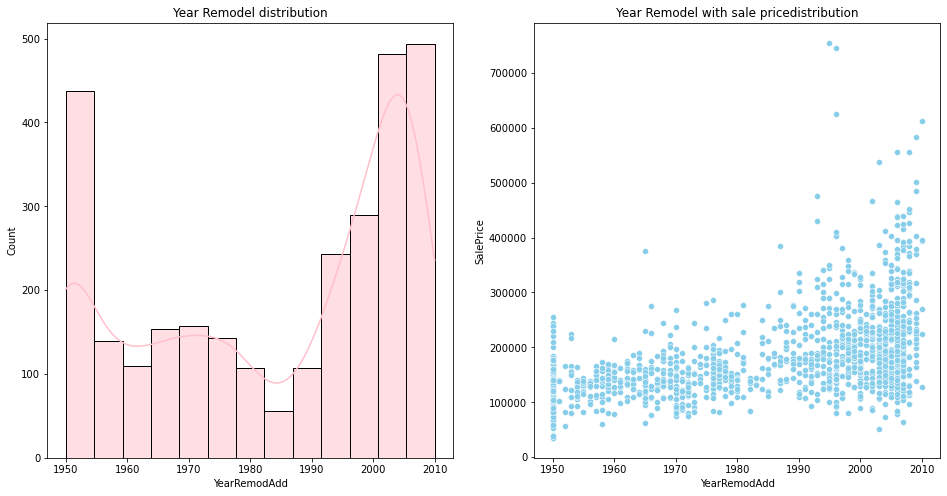

In [362]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Year Remodel distribution")
sns.histplot(df['YearRemodAdd'],color='pink',kde=True)


plt.subplot(1,2,2)
plt.title("Year Remodel with sale pricedistribution")
sns.scatterplot(df['YearRemodAdd'],df['SalePrice'],color='skyblue');

Observation:

    highest house build in 1950 around 361
    most of the houses were remodeled between 1990 to 2010

Visualizing MasVnrArea :Masonry veneer area in square feet

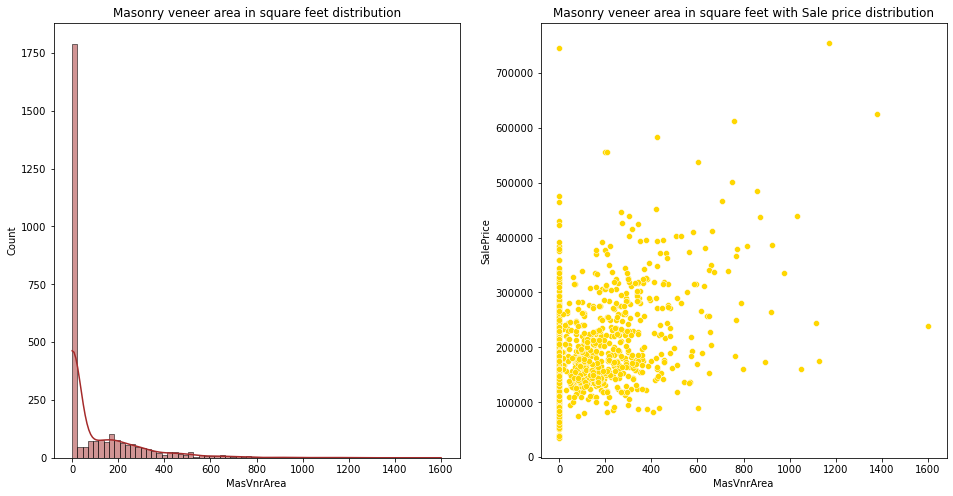

In [363]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Masonry veneer area in square feet distribution")
sns.histplot(df['MasVnrArea'],color='brown',kde=True)


plt.subplot(1,2,2)
plt.title("Masonry veneer area in square feet with Sale price distribution")
sns.scatterplot(df['MasVnrArea'],df['SalePrice'],color='gold');

observation:
    
     Most of the houses have 0.0 Masonry veneer area

Visualizing TotalBsmtSF: Total square feet of basement area

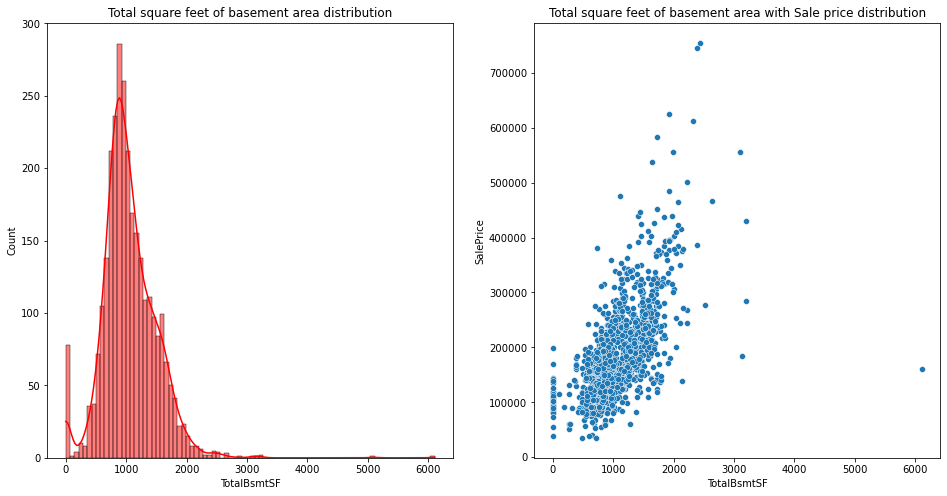

In [364]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Total square feet of basement area distribution")
sns.histplot(df['TotalBsmtSF'],color='red',kde=True)


plt.subplot(1,2,2)
plt.title("Total square feet of basement area with Sale price distribution")
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice']);

observation :
    
    Most of the houses have 1000 sqft basement size
    Highest basement sq feet of house is 6000 sqft.

Visualizing FullBath Full bathrooms above grade

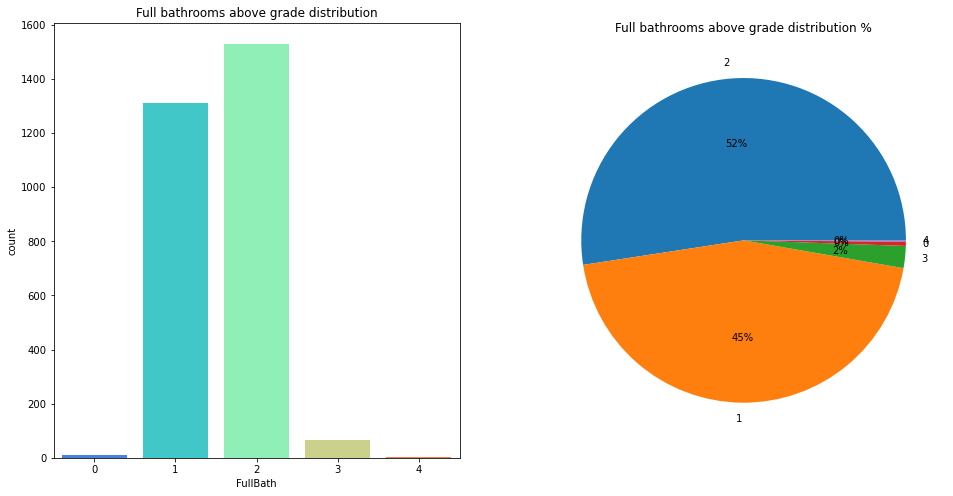

In [365]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Full bathrooms above grade distribution")
sns.countplot(df['FullBath'],palette='rainbow',data=df)

plt.subplot(1,2,2)
plt.title("Full bathrooms above grade distribution %")
plt.pie(df['FullBath'].value_counts(),labels=df['FullBath'].unique(),autopct='%0.0f%%',data=df);

Visualizing HalfBath: Half baths above grade

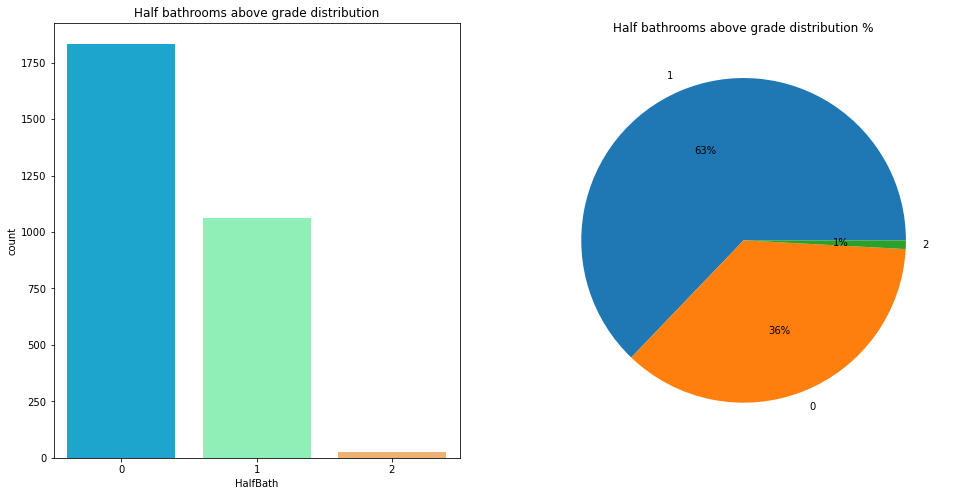

In [366]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Half bathrooms above grade distribution")
sns.countplot(df['HalfBath'],palette='rainbow',data=df)

plt.subplot(1,2,2)
plt.title("Half bathrooms above grade distribution %")
plt.pie(df['HalfBath'].value_counts(),labels=df['HalfBath'].unique(),autopct='%0.0f%%',data=df);

Visualizing YrSold year sold

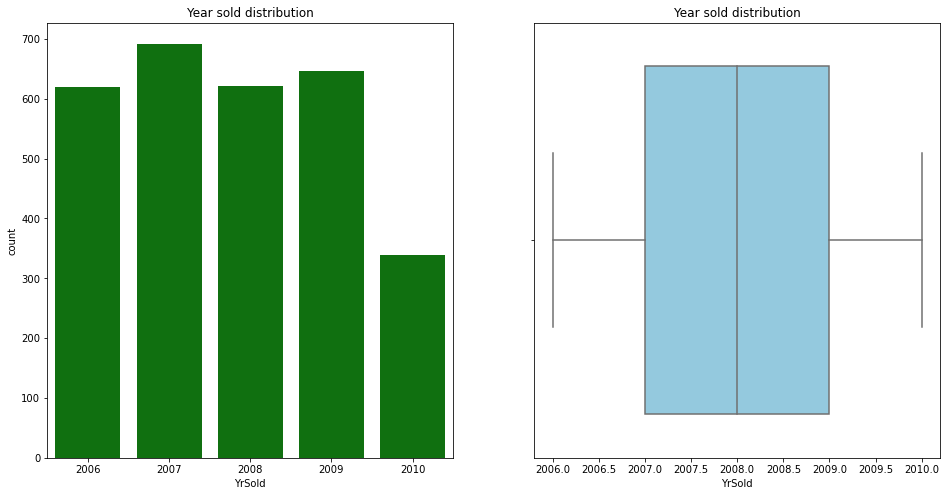

In [367]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Year sold distribution")
sns.countplot(df['YrSold'],color='green')


plt.subplot(1,2,2)
plt.title("Year sold distribution")
sns.boxplot(df['YrSold'],color='skyblue');

Observation:
    
    most of the house sold in 2007
    
    least house sold in 2010

Visualizing GarageArea 

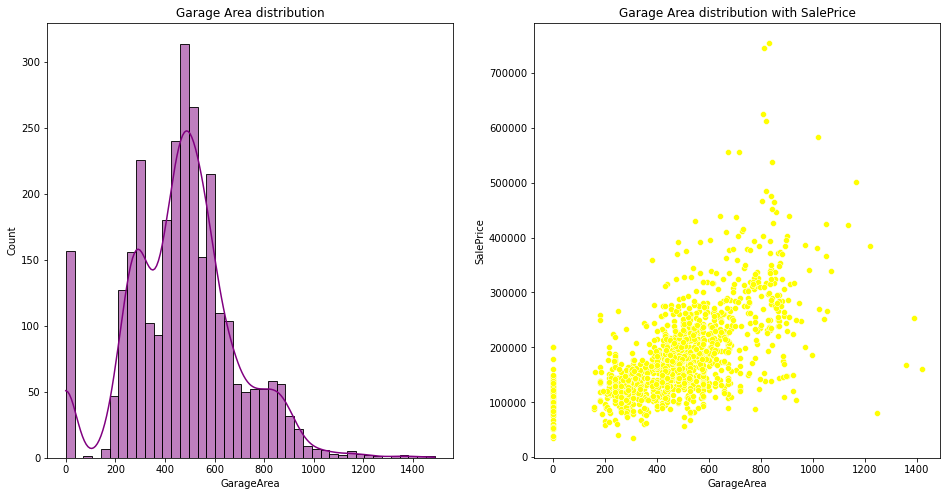

In [368]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Garage Area distribution")
sns.histplot(df['GarageArea'],color='purple',kde=True)


plt.subplot(1,2,2)
plt.title("Garage Area distribution with SalePrice")
sns.scatterplot(df['GarageArea'],df['SalePrice'],color='yellow');

In [369]:
# MSSubClass	LotFrontage	LotArea

Visualizing MSSubClass feature: 
    
    Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

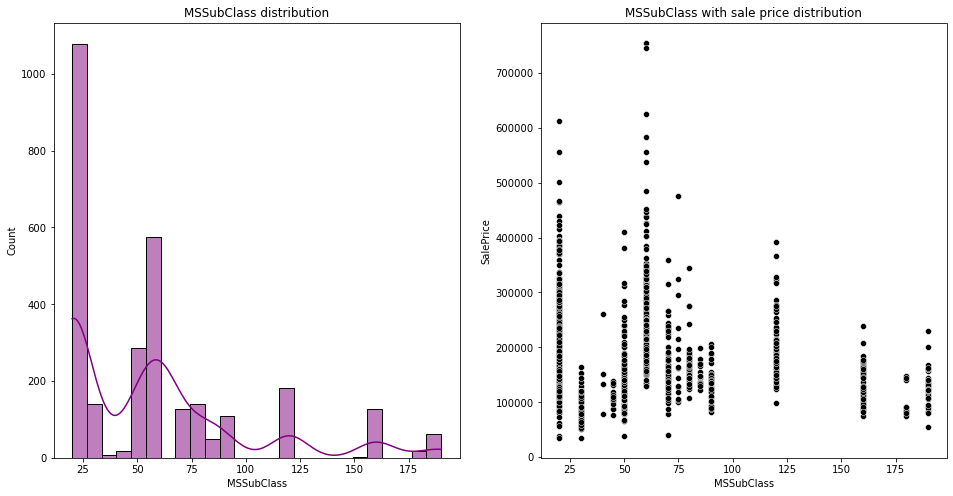

In [370]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("MSSubClass distribution")
sns.histplot(df['MSSubClass'],color='purple',kde=True)


plt.subplot(1,2,2)
plt.title("MSSubClass with sale price distribution")
sns.scatterplot(df['MSSubClass'],df['SalePrice'],color='black');

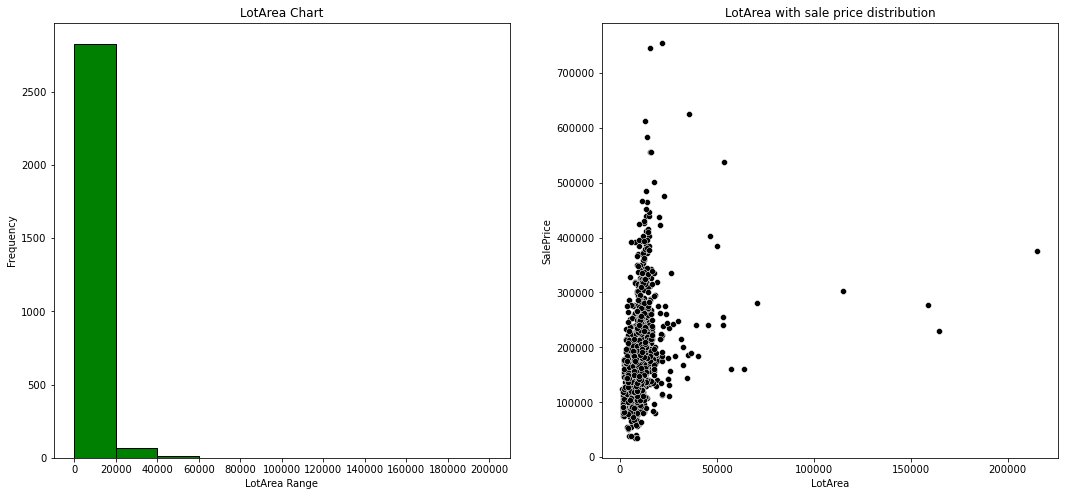

In [371]:
plt.figure(figsize=(18,8));
plt.subplot(1,2,1)
plt.hist(df["LotArea"],edgecolor="black",color="g",bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.title("LotArea Chart");
plt.xlabel("LotArea Range");
plt.ylabel("Frequency");

plt.subplot(1,2,2)
plt.title("LotArea with sale price distribution")
sns.scatterplot(df['LotArea'],df['SalePrice'],color='black');

Observation:

    Lot size in square feet ranges between 0 to 20000

Visualizing Fireplaces Feature

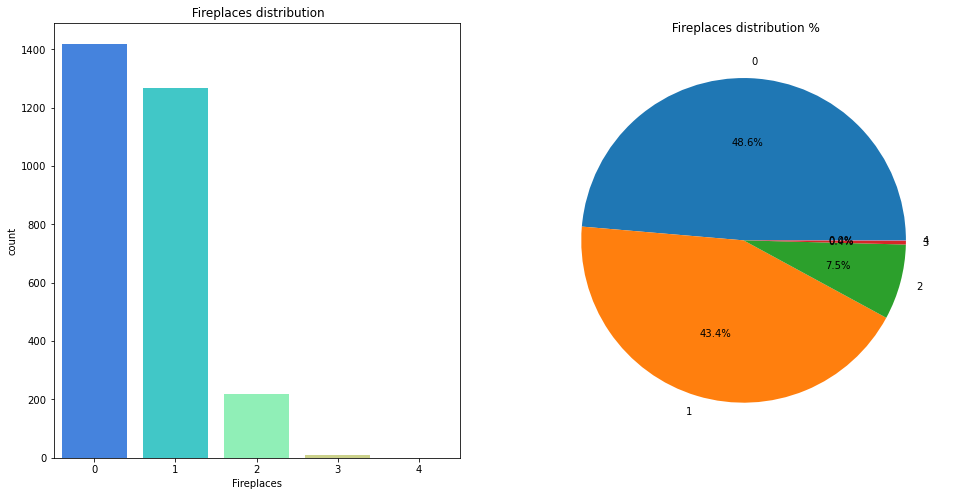

In [372]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title(" Fireplaces distribution")
sns.countplot(df['Fireplaces'],palette='rainbow',data=df)

plt.subplot(1,2,2)
plt.title(" Fireplaces distribution %")
plt.pie(df['Fireplaces'].value_counts(),labels=df['Fireplaces'].unique(),autopct='%0.1f%%',data=df);

Observation :
    
    Most of the houses have zero fireplaces around 49%   

<AxesSubplot:title={'center':'fireplaces distribution as per Average Sale Price'}, xlabel='Fireplaces', ylabel='SalePrice'>

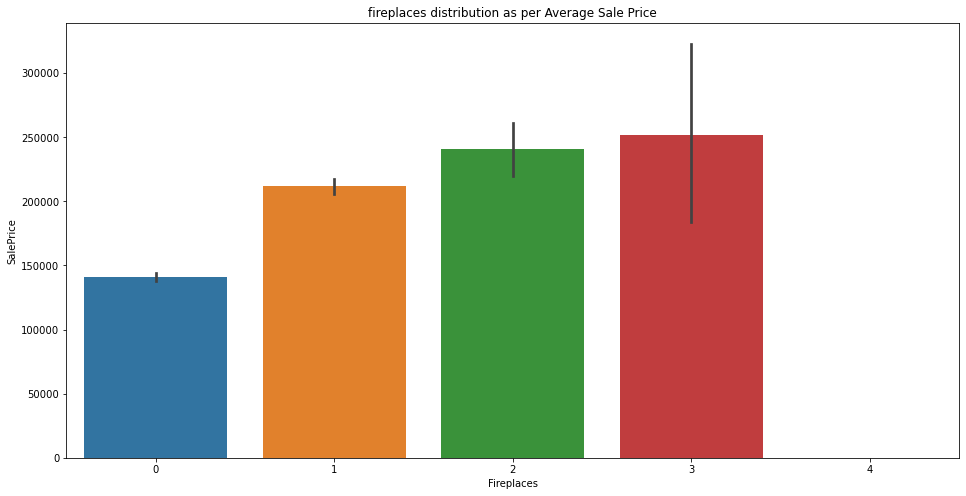

In [373]:
plt.figure(figsize=(16,8))
plt.title("fireplaces distribution as per Average Sale Price")
sns.barplot(df['Fireplaces'],df['SalePrice'])

Observation :
    
    the house which have 2 firplaces have high Sale price

Visualizing Pool Area Feature

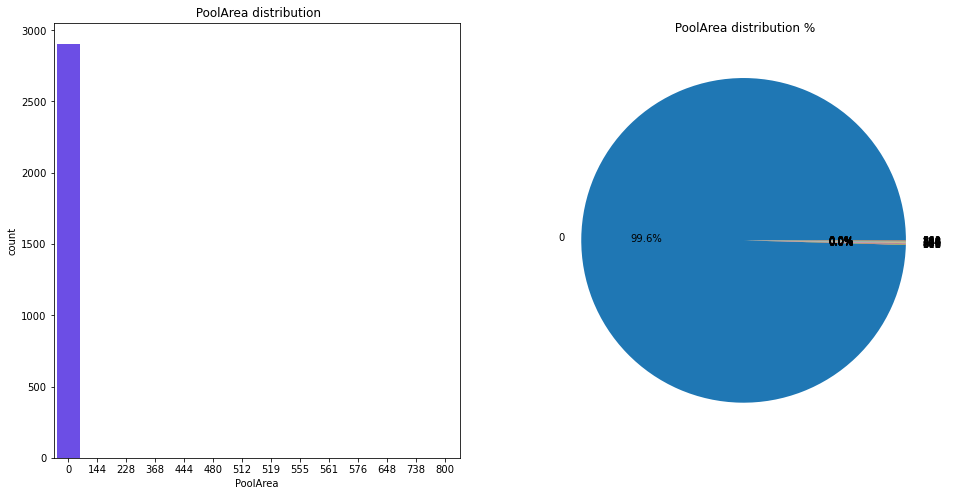

In [374]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title(" PoolArea distribution")
sns.countplot(df['PoolArea'],palette='rainbow',data=df)

plt.subplot(1,2,2)
plt.title(" PoolArea distribution %")
plt.pie(df['PoolArea'].value_counts(),labels=df['PoolArea'].unique(),autopct='%0.1f%%',data=df);

Observation:
    
    Most of the houses have no pool area

<AxesSubplot:title={'center':'Pool Area distribution as per Average Sale Price'}, xlabel='PoolArea', ylabel='SalePrice'>

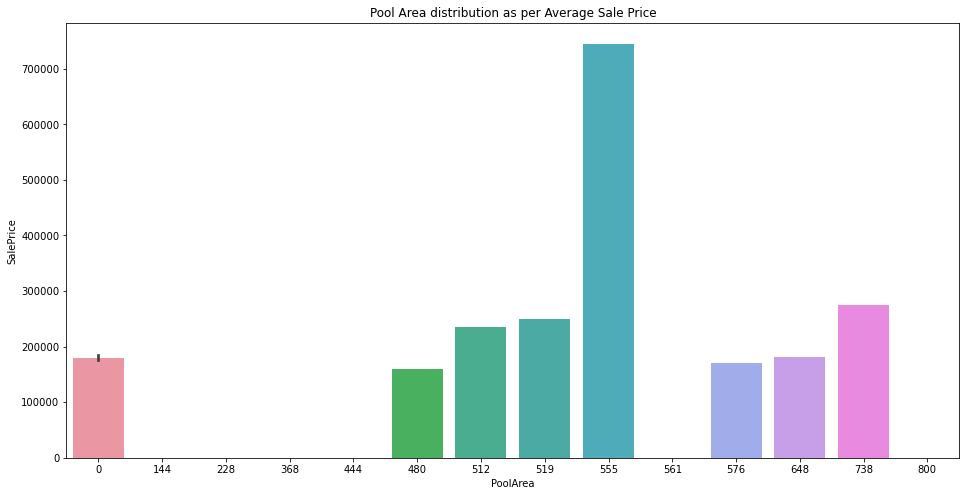

In [375]:
plt.figure(figsize=(16,8))
plt.title("Pool Area distribution as per Average Sale Price")
sns.barplot(df['PoolArea'],df['SalePrice'])

Observation:
    
    Average price is high of pool area with 555.

# Visualizing Categorical Features:

Visualizing MSZoning feature:

    MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

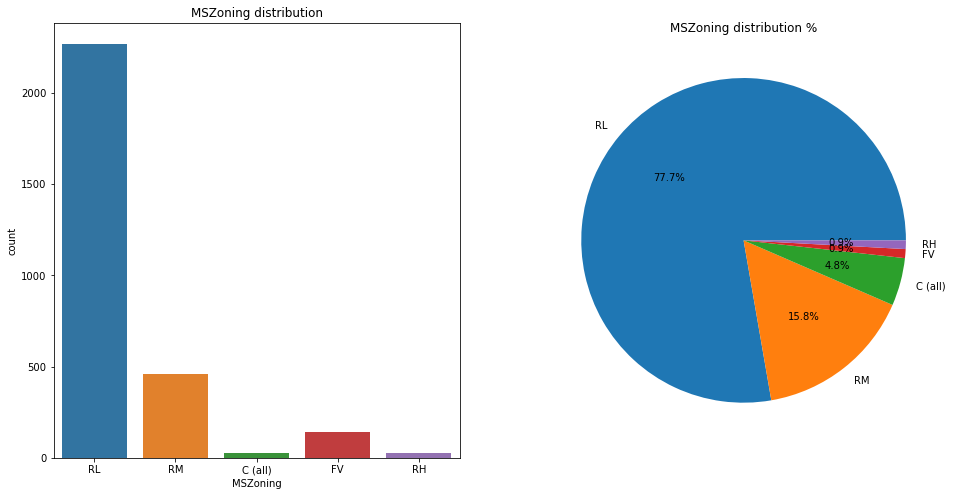

In [376]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("MSZoning distribution")
sns.countplot(df['MSZoning'])

plt.subplot(1,2,2)
plt.title("MSZoning distribution %")
plt.pie(df['MSZoning'].value_counts(),labels=df['MSZoning'].unique(),autopct='%0.1f%%',data=df);

Observation :
    
    Most of the house have RL (Residential Low Density) zoning area 
    around 78%

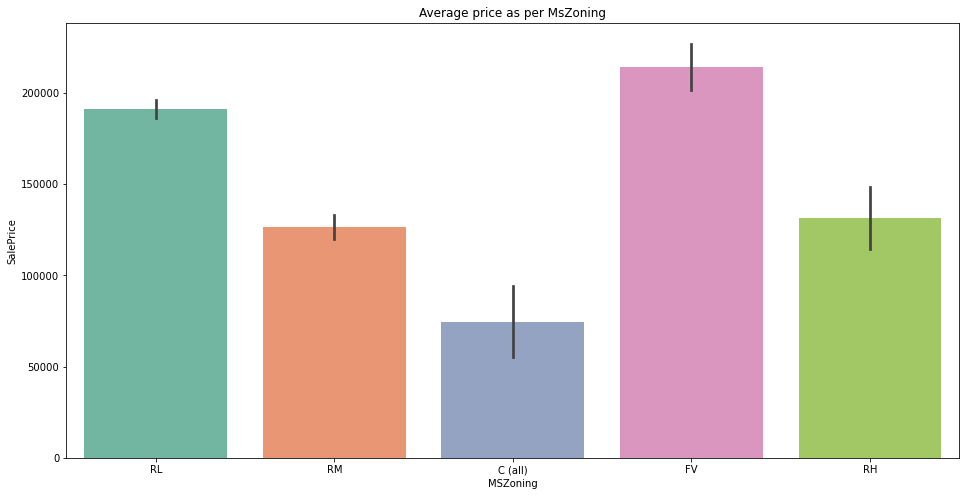

In [377]:
plt.figure(figsize=(16,8))
plt.title("Average price as per MsZoning")
sns.barplot(df['MSZoning'],df['SalePrice'],palette='Set2',data=df);

observation :
    
    sale price of the FV (Floating Village Residential) zoining is high

Visualizing Street feature:
       
       Type of road access to property

       Grvl	Gravel	
       Pave	Paved

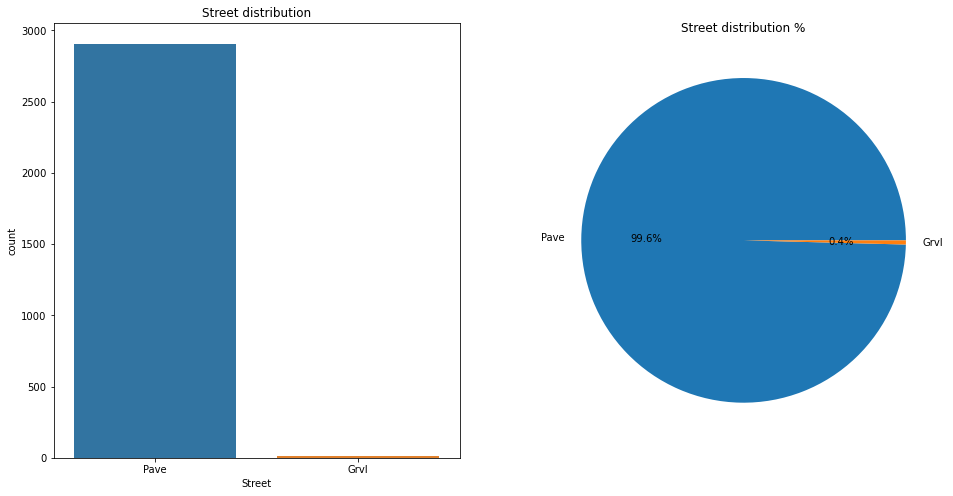

In [378]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Street distribution")
sns.countplot(df['Street'])

plt.subplot(1,2,2)
plt.title("Street distribution %")
plt.pie(df['Street'].value_counts(),labels=df['Street'].unique(),autopct='%0.1f%%',data=df);

Observation:
    
    most of the houses has paved streets around 99.6%

<AxesSubplot:title={'center':'Average price as per MsZoning'}, xlabel='Street', ylabel='SalePrice'>

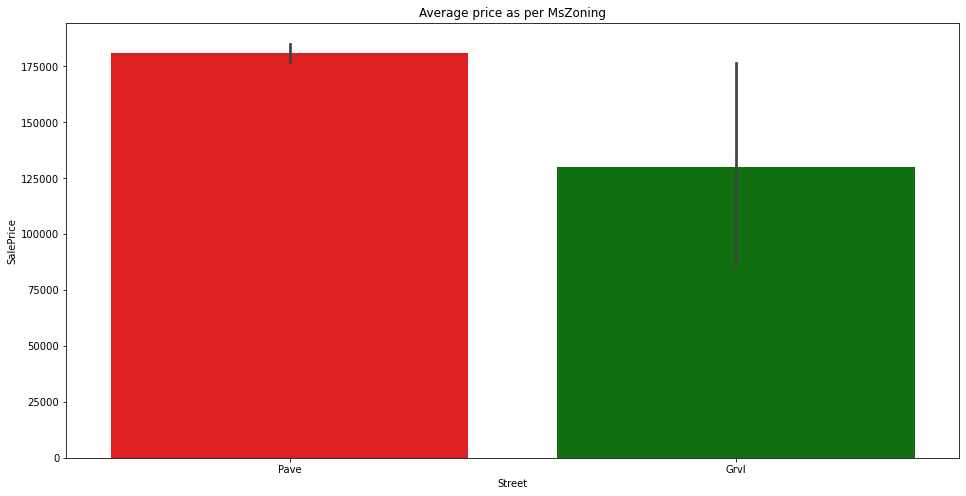

In [379]:
plt.figure(figsize=(16,8))
plt.title("Average price as per MsZoning")
sns.barplot(df['Street'],df['SalePrice'],palette=['red','green'],data=df)

Observation:

    Average price for paved house is high

Visualizing LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

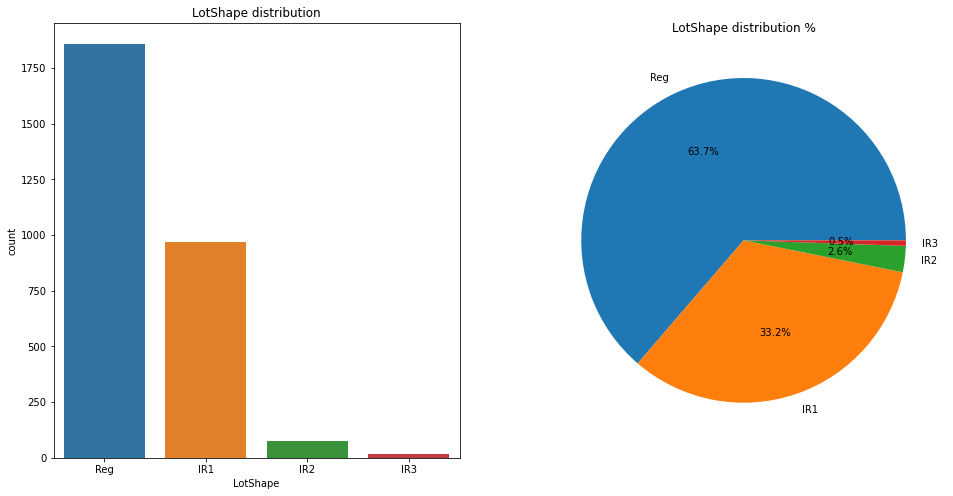

In [380]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("LotShape distribution")
sns.countplot(df['LotShape'])

plt.subplot(1,2,2)
plt.title("LotShape distribution %")
plt.pie(df['LotShape'].value_counts(),labels=df['LotShape'].unique(),autopct='%0.1f%%',data=df);

Observation :
    
    Most of the houses have regular shape of property around 63.7 %
    and demand for IR1 Slightly irregular shape of property is also high around 33.2%

<AxesSubplot:title={'center':'Average price as per LotShape'}, xlabel='LotShape', ylabel='SalePrice'>

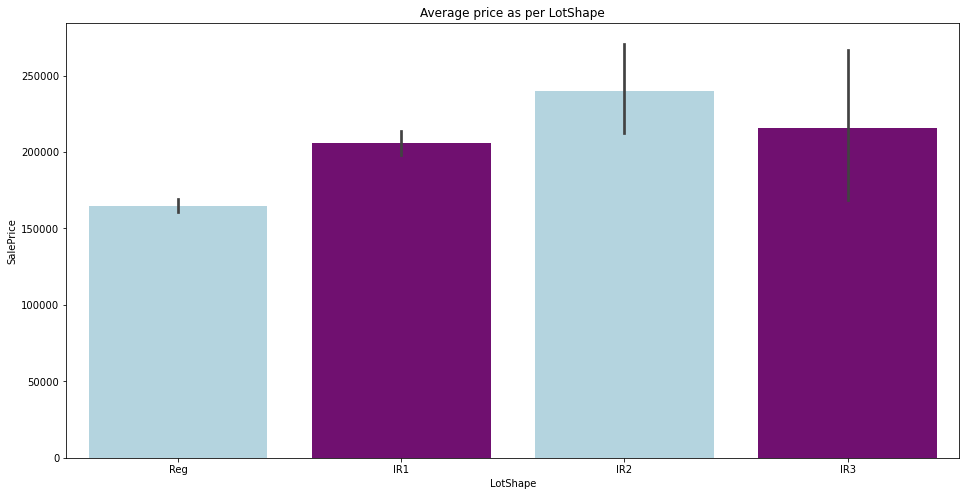

In [381]:
plt.figure(figsize=(16,8))
plt.title("Average price as per LotShape")
sns.barplot(df['LotShape'],df['SalePrice'],palette=['lightblue','purple'],data=df)

observation 

    The sale price of ir3 is high among all others.

visualizing HouseStyle Feature:

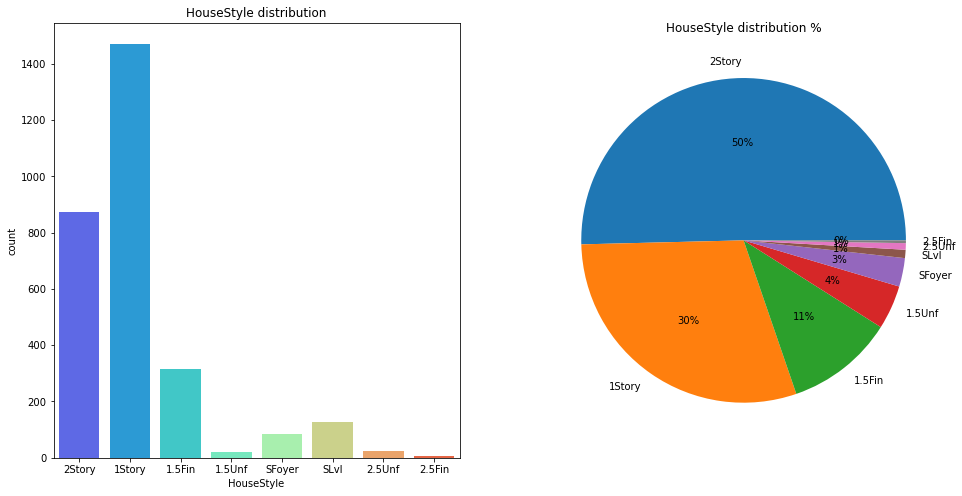

In [382]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("HouseStyle distribution")
sns.countplot(df['HouseStyle'],palette='rainbow')

plt.subplot(1,2,2)
plt.title("HouseStyle distribution %")
plt.pie(df['HouseStyle'].value_counts(),labels=df['HouseStyle'].unique(),autopct='%0.0f%%',data=df);

Observation :
    
    Most of the houses are 1 story around 50% 

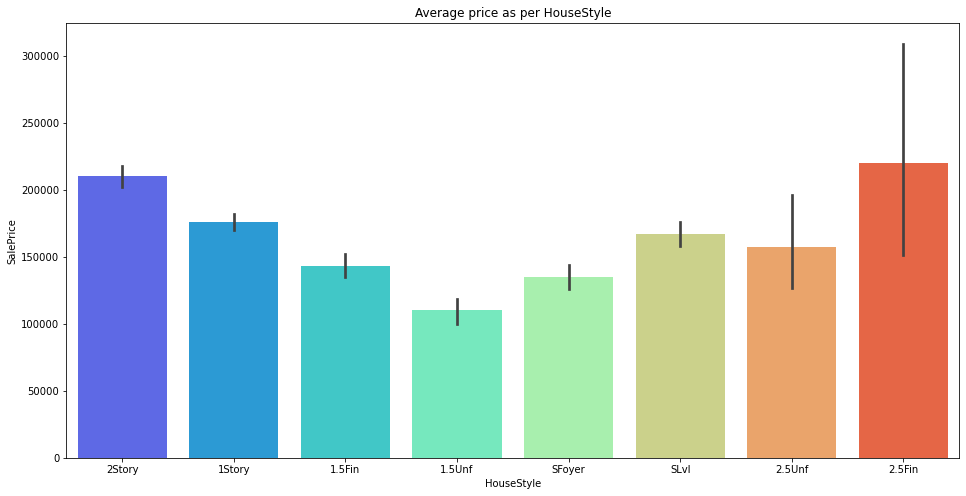

In [383]:
plt.figure(figsize=(16,8))
plt.title("Average price as per HouseStyle")
sns.barplot(df['HouseStyle'],df['SalePrice'],palette='rainbow',data=df);

Visualizing KitchenAbvGr Feature:

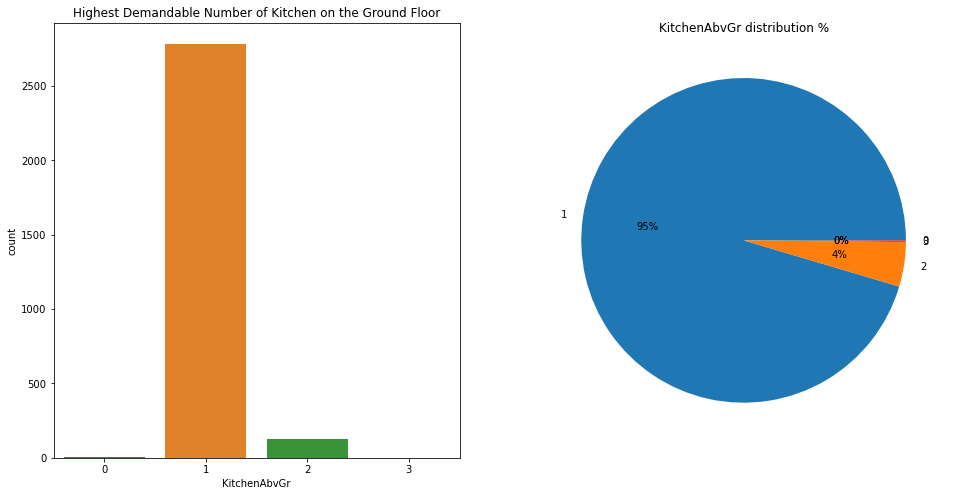

In [384]:
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sns.countplot(x="KitchenAbvGr",data=df);
plt.title("Highest Demandable Number of Kitchen on the Ground Floor");

plt.subplot(1,2,2)
plt.title("KitchenAbvGr distribution %")
plt.pie(df['KitchenAbvGr'].value_counts(),labels=df['KitchenAbvGr'].unique(),autopct='%0.0f%%',data=df);

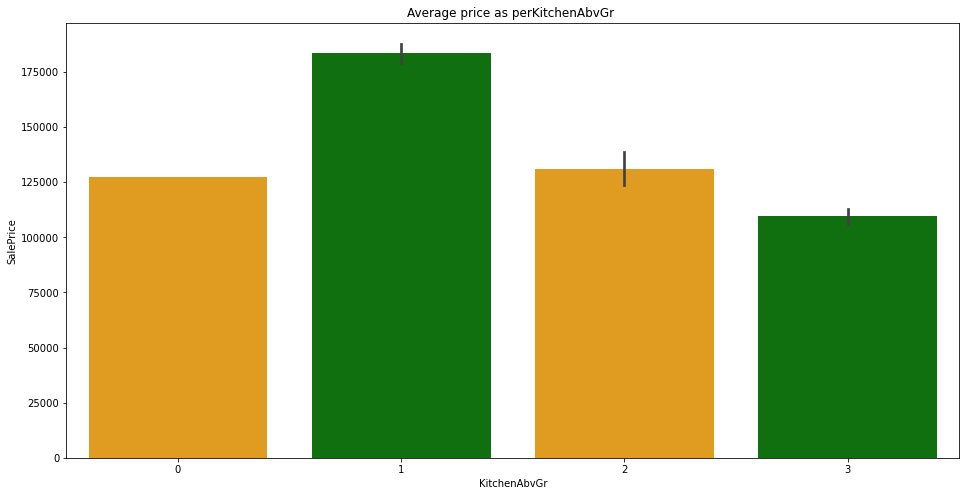

In [385]:
plt.figure(figsize=(16,8))
plt.title("Average price as perKitchenAbvGr ")
sns.barplot(df['KitchenAbvGr'],df['SalePrice'],palette=['orange','green'],data=df);

Observation:
    We can see the highest demandable kitchen on th ground floor is 1 and we can also see the averge price of the above chart.

In [386]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          2003       196.0        856.0       856       854       1710   
1          1976         0.0       1262.0      1262         0       1262   
2          2002       162.0        920.0       920       866       1786   
3          1970         0.0        756.0       961       756       1717   
4          2000       350.0       1145.0      1145      1053       2198   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  PoolArea  YrSold  SalePrice MSZoning Street  \
0         2.0       548.0         0    2008   208500.0       RL   Pave   
1         2.0       460.0         0    2007   181500.0       RL   Pave   
2         2.0       608.0         0    2008   223500.0       RL   Pave   
3         3.0       642.0         0    2006   140000.0       RL   Pave   
4         3.0       836.0         0    2008   250000.0       RL   Pave   

  LotShape LandContour Utilities Neighborhood Condition1 HouseStyle RoofStyle  \
0      Reg         Lvl    AllPub      CollgCr       Norm     2Story     Gable   
1      Reg         Lvl    AllPub      Veenker      Feedr     1Story     Gable   
2      IR1         Lvl    AllPub      CollgCr       Norm     2Story     Gable   
3      IR1         Lvl    AllPub      Crawfor       Norm     2Story     Gable   
4      IR1         Lvl    AllPub      NoRidge       Norm     2Story     Gable   

  RoofMatl Exterior2nd ExterQual ExterCond Foundation BsmtQual HeatingQC  \
0  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   
1  CompShg     MetalSd        TA        TA     CBlock       Gd        Ex   
2  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   
3  CompShg     Wd Shng        TA        TA     BrkTil       TA        Gd   
4  CompShg     VinylSd        Gd        TA      PConc       Gd        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageCond  \
0          Y      SBrkr          Gd        Typ     Attchd         TA   
1          Y      SBrkr          TA        Typ     Attchd         TA   
2          Y      SBrkr          Gd        Typ     Attchd         TA   
3          Y      SBrkr          Gd        Typ     Detchd         TA   
4          Y      SBrkr          Gd        Typ     Attchd         TA   

  PavedDrive SaleType SaleCondition  
0          Y       WD        Normal  
1          Y       WD        Normal  
2          Y       WD        Normal  
3          Y       WD       Abnorml  
4          Y       WD        Normal

Visualizing Central Air:

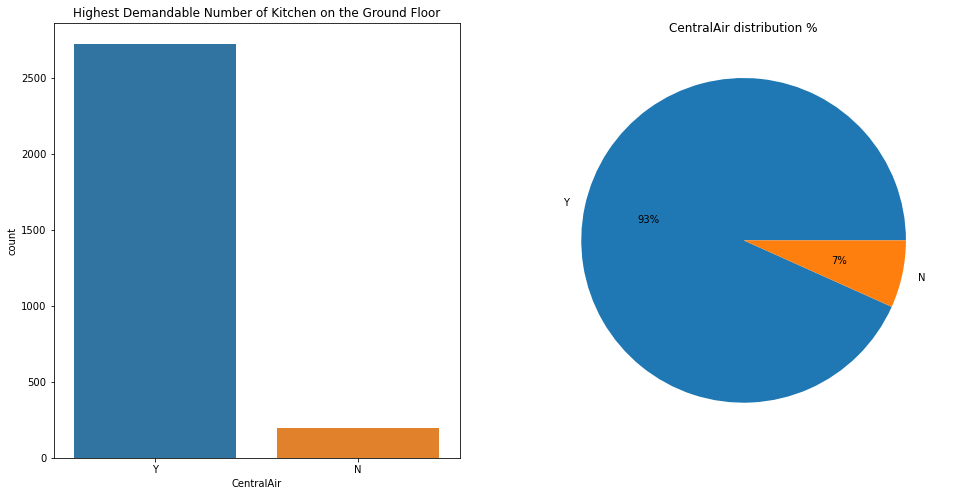

In [387]:
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sns.countplot(x="CentralAir",data=df);
plt.title("Highest Demandable Number of Kitchen on the Ground Floor");

plt.subplot(1,2,2)
plt.title("CentralAir distribution %")
plt.pie(df['CentralAir'].value_counts(),labels=df['CentralAir'].unique(),autopct='%0.0f%%',data=df);

Observations :
    93 % of houses have central air condition

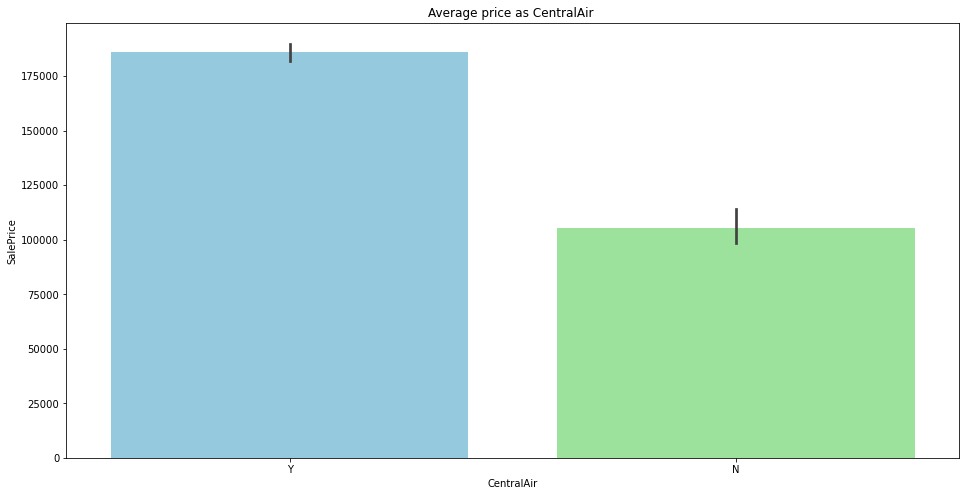

In [388]:
plt.figure(figsize=(16,8))
plt.title("Average price as CentralAir ")
sns.barplot(df['CentralAir'],df['SalePrice'],palette=['skyblue','lightgreen'],data=df);

observation 

    houses with central air condition having a high sales price

Visualizing Neighborhood feature:
    
    Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

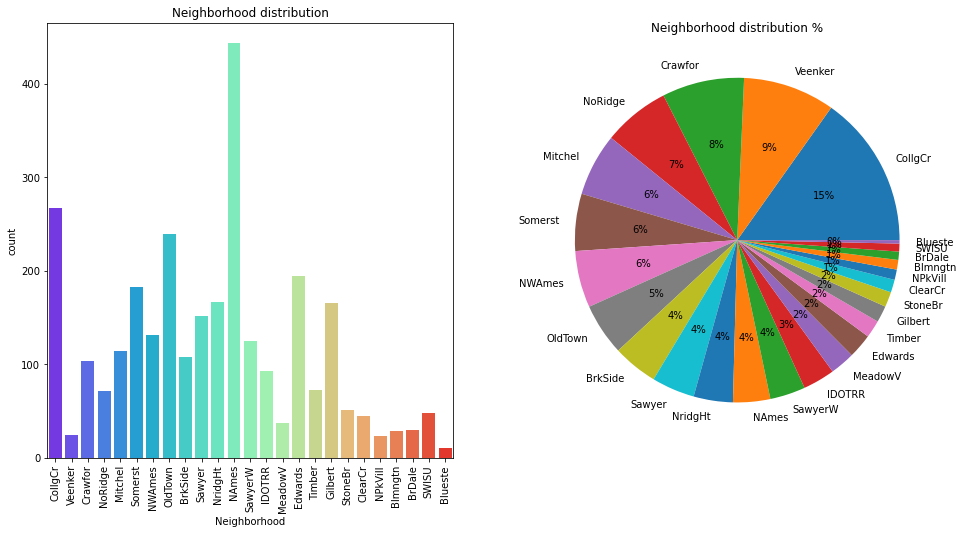

In [389]:
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sns.countplot(x="Neighborhood",palette='rainbow',data=df);
plt.xticks(rotation=90)
plt.title("Neighborhood distribution");

plt.subplot(1,2,2)
plt.title("Neighborhood distribution %")
plt.pie(df['Neighborhood'].value_counts(),labels=df['Neighborhood'].unique(),autopct='%0.0f%%',data=df);

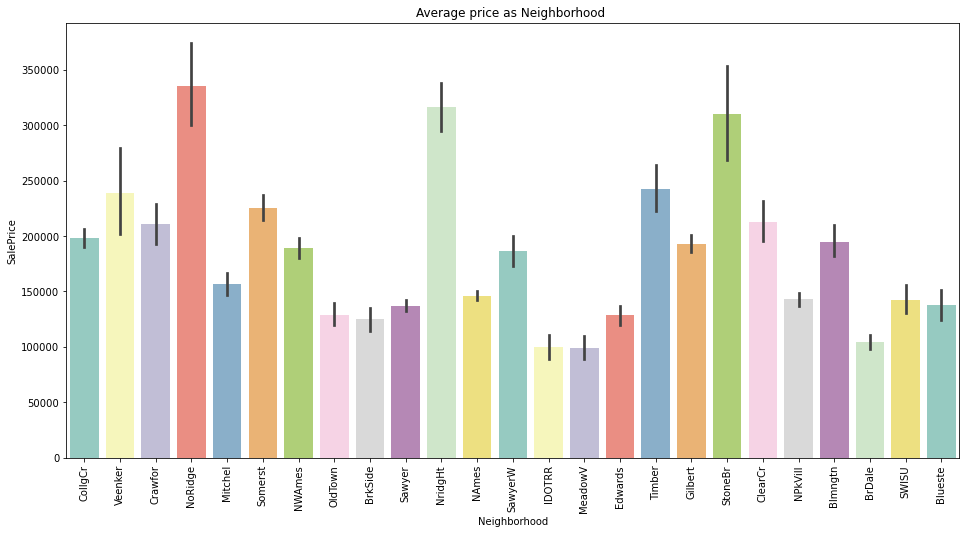

In [390]:
plt.figure(figsize=(16,8))
plt.title("Average price as Neighborhood ")
sns.barplot(df['Neighborhood'],df['SalePrice'],palette='Set3',data=df)
plt.xticks(rotation=90);

Visualizing SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

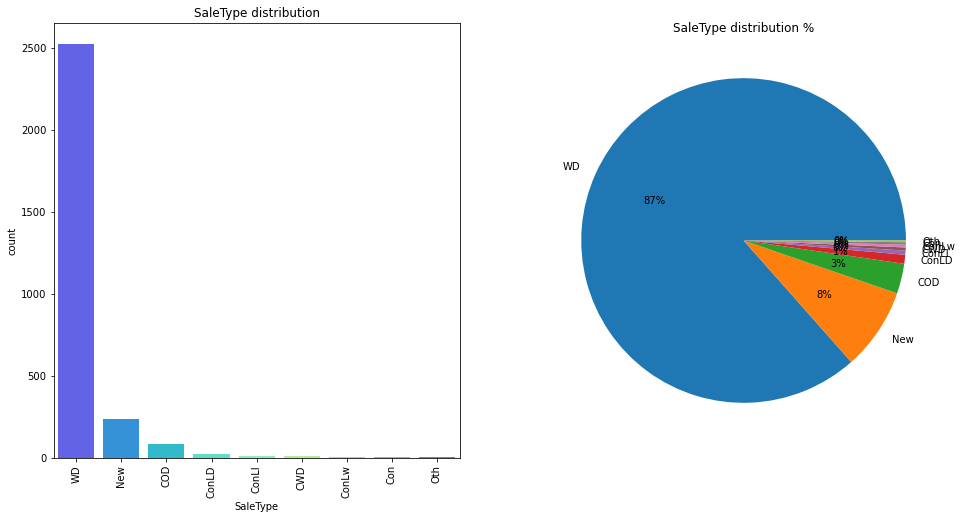

In [391]:
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sns.countplot(x="SaleType",palette='rainbow',data=df);
plt.xticks(rotation=90)
plt.title("SaleType distribution");

plt.subplot(1,2,2)
plt.title("SaleType distribution %")
plt.pie(df['SaleType'].value_counts(),labels=df['SaleType'].unique(),autopct='%0.0f%%',data=df);

observation:
    
    Most of the houses deals was  Warranty Deed - Conventional around 87%.

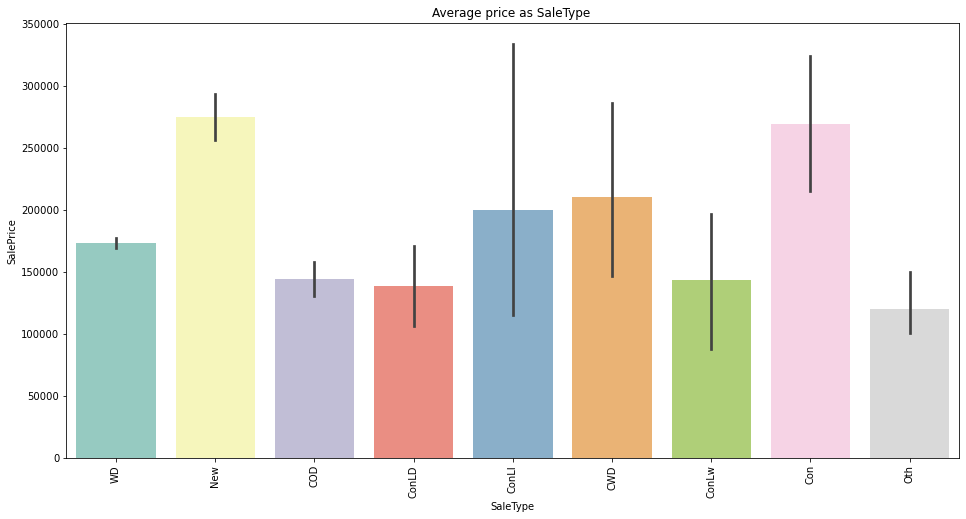

In [392]:
plt.figure(figsize=(16,8))
plt.title("Average price as SaleType ")
sns.barplot(df['SaleType'],df['SalePrice'],palette='Set3',data=df)
plt.xticks(rotation=90);

Visualizing SaleCondition Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

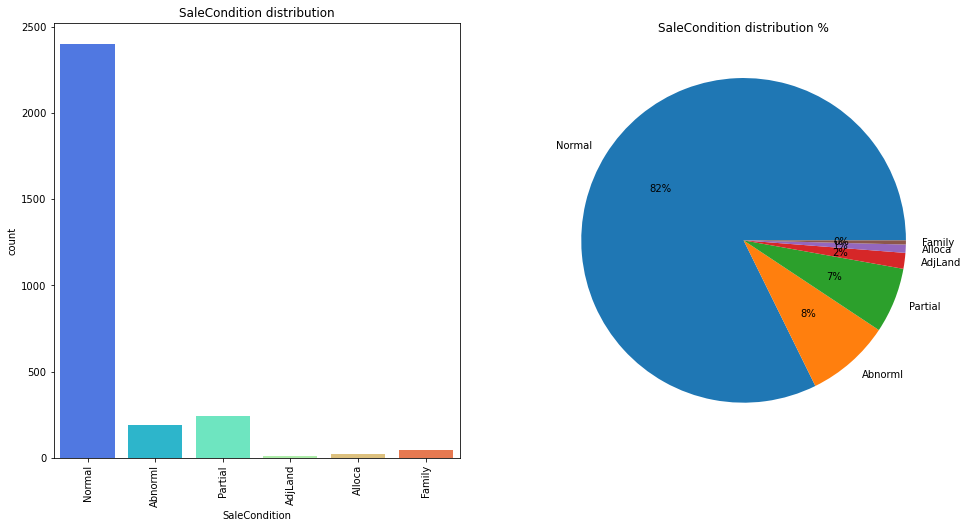

In [393]:
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
sns.countplot(x="SaleCondition",palette='rainbow',data=df);
plt.xticks(rotation=90)
plt.title("SaleCondition distribution");

plt.subplot(1,2,2)
plt.title("SaleCondition distribution %")
plt.pie(df['SaleCondition'].value_counts(),labels=df['SaleCondition'].unique(),autopct='%0.0f%%',data=df);

observation:
    
    most of the houses sales condition is normal around 82%

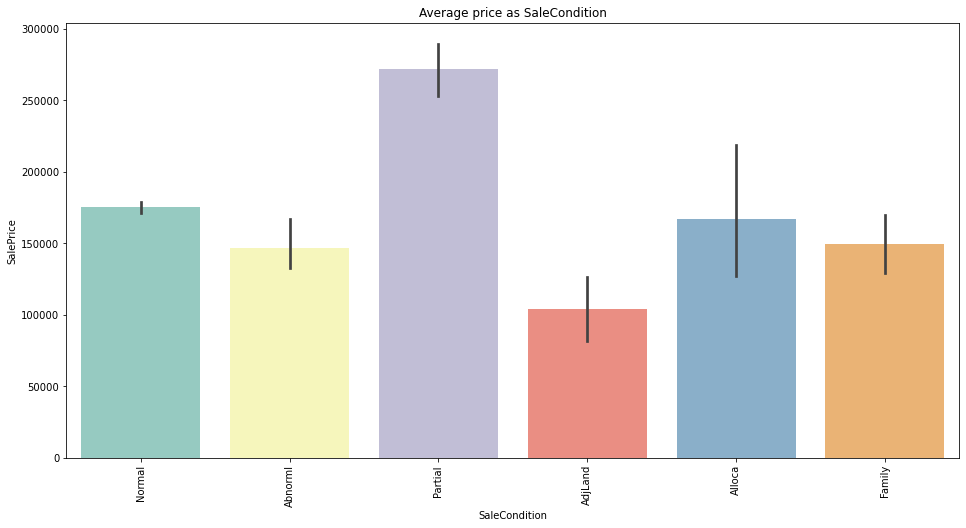

In [394]:
plt.figure(figsize=(16,8))
plt.title("Average price as SaleCondition")
sns.barplot(df['SaleCondition'],df['SalePrice'],palette='Set3',data=df)
plt.xticks(rotation=90);

observation:
    
    average price for partial sales condition is high

# DATA PREPROCESSING

In [395]:
a=df.select_dtypes(include=object)

In [396]:
from sklearn import preprocessing

In [397]:
label_encoder = preprocessing.LabelEncoder()

In [398]:
df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])

In [399]:
df['Street']= label_encoder.fit_transform(df['Street'])

In [400]:
df['LotShape']= label_encoder.fit_transform(df['LotShape'])

In [401]:
df['Utilities']= label_encoder.fit_transform(df['Utilities'])

In [402]:
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])

In [403]:
df['Condition1']= label_encoder.fit_transform(df['Condition1'])

In [404]:
df['HouseStyle']= label_encoder.fit_transform(df['HouseStyle'])

In [405]:
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])

In [406]:
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])

In [407]:
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])

In [408]:
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])

In [409]:
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])

In [410]:
df['Foundation']= label_encoder.fit_transform(df['Foundation'])

In [411]:
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])

In [412]:
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])

In [413]:
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])

In [414]:
df['Electrical']= label_encoder.fit_transform(df['Electrical'])

In [415]:
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])

In [416]:
df['Functional']= label_encoder.fit_transform(df['Functional'])

In [417]:
df['GarageType']= label_encoder.fit_transform(df['GarageType'])

In [418]:
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])

In [419]:
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])

In [420]:
df['SaleType']= label_encoder.fit_transform(df['SaleType'])

In [421]:
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])

In [422]:
df['LandContour']= label_encoder.fit_transform(df['LandContour'])

In [423]:
df.tail(10)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1449         180         21.0     1470            4            6       1970   
1450         160         21.0     1484            4            4       1972   
1451          20         80.0    13384            5            5       1969   
1452         160         21.0     1533            4            5       1970   
1453         160         21.0     1526            4            5       1970   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1449          1970         0.0        630.0       630         0        630   
1450          1972         0.0        546.0       546       546       1092   
1451          1979       194.0       1104.0      1360         0       1360   
1452          1970         0.0        546.0       546       546       1092   
1453          1970         0.0        546.0       546       546       1092   
1454          1970         0.0        546.0       546       546       1092   
1455          1970         0.0        546.0       546       546       1092   
1456          1996         0.0       1224.0      1224         0       1224   
1457          1992         0.0        912.0       970         0        970   
1458          1994        94.0        996.0       996      1004       2000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
1449         1         0             1             1             3   
1450         1         1             3             1             5   
1451         1         0             3             1             8   
1452         1         1             3             1             5   
1453         1         1             3             1             5   
1454         1         1             3             1             5   
1455         1         1             3             1             6   
1456         1         0             4             1             7   
1457         1         0             3             1             6   
1458         2         1             3             1             9   

      Fireplaces  GarageCars  GarageArea  PoolArea  YrSold  SalePrice  \
1449           0         0.0         0.0         0    2006        NaN   
1450           0         1.0       253.0         0    2006        NaN   
1451           1         1.0       336.0         0    2006        NaN   
1452           0         1.0       286.0         0    2006        NaN   
1453           0         0.0         0.0         0    2006        NaN   
1454           0         0.0         0.0         0    2006        NaN   
1455           0         1.0       286.0         0    2006        NaN   
1456           1         2.0       576.0         0    2006        NaN   
1457           0         0.0         0.0         0    2006        NaN   
1458           1         3.0       650.0         0    2006        NaN   

      MSZoning  Street  LotShape  LandContour  Utilities  Neighborhood  \
1449         4       1         3            3          0            10   
1450         4       1         3            3          0            10   
1451         3       1         3            3          0            11   
1452         4       1         3            3          0            10   
1453         4       1         3            3          0            10   
1454         4       1         3            3          0            10   
1455         4       1         3            3          0            10   
1456         3       1         3            3          0            11   
1457         3       1         3    

In [424]:
# segregating train and test data

In [427]:
df.isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
PoolArea            0
YrSold              0
SalePrice        1459
MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
Neighborhood        0
Condition1          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
GarageType          0
GarageCond          0
PavedDrive

In [428]:
train1=df[~df['SalePrice'].isnull()]

In [429]:
train1.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PoolArea         0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [430]:
test1=df[df['SalePrice'].isnull()]

In [432]:
test1.isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
PoolArea            0
YrSold              0
SalePrice        1459
MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
Neighborhood        0
Condition1          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
GarageType          0
GarageCond          0
PavedDrive

In [434]:
test1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          1961         0.0        882.0       896         0        896   
1          1958       108.0       1329.0      1329         0       1329   
2          1998         0.0        928.0       928       701       1629   
3          1998        20.0        926.0       926       678       1604   
4          1992         0.0       1280.0      1280         0       1280   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageCars  GarageArea  PoolArea  YrSold  SalePrice  MSZoning  Street  \
0         1.0       730.0         0    2010        NaN         2       1   
1         1.0       312.0         0    2010        NaN         3       1   
2         2.0       482.0         0    2010        NaN         3       1   
3         2.0       470.0         0    2010        NaN         3       1   
4         2.0       506.0         0    2010        NaN         3       1   

   LotShape  LandContour  Utilities  Neighborhood  Condition1  HouseStyle  \
0         3            3          0            12           1           2   
1         0            3          0            12           2           2   
2         0            3          0             8           2           5   
3         0            3          0             8           2           5   
4         0            1          0            22           2           2   

   RoofStyle  RoofMatl  Exterior2nd  ExterQual  ExterCond  Foundation  \
0          1         1           13          3          4           1   
1          3         1           14          3          4           1   
2          1         1           13          3          4           2   
3          1         1           13          3          4           2   
4          1         1            6          2          4           2   

   BsmtQual  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0         3          4           1           4            3           6   
1         3          4           1           4            2           6   
2         2          2           1           4            3           6   
3         3          0           1           4            2           6   
4         2          0           1           4            2           6   

   GarageType  GarageCond  PavedDrive  SaleType  SaleCondition  
0           1           4           2         8              4  
1           1           4           2         8              4  
2           1           4           2         8              4  
3           1           4           2         8              4  
4           1           4           2         8              4

In [435]:
train1.shape

(1460, 48)

In [436]:
test1.shape

(1459, 48)

In [437]:
test1.drop(columns=['SalePrice'],inplace=True)

In [438]:
train1.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PoolArea         0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [439]:
test1.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PoolArea         0
YrSold           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# Segregate the features to train model

In [452]:
x = train1.drop(columns=['SalePrice'])
y = train1['SalePrice']

In [453]:
x.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PoolArea         0
YrSold           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
Condition1       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [454]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [455]:
x.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          2003       196.0        856.0       856       854       1710   
1          1976         0.0       1262.0      1262         0       1262   
2          2002       162.0        920.0       920       866       1786   
3          1970         0.0        756.0       961       756       1717   
4          2000       350.0       1145.0      1145      1053       2198   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  PoolArea  YrSold  MSZoning  Street  LotShape  \
0         2.0       548.0         0    2008         3       1         3   
1         2.0       460.0         0    2007         3       1         3   
2         2.0       608.0         0    2008         3       1         0   
3         3.0       642.0         0    2006         3       1         0   
4         3.0       836.0         0    2008         3       1         0   

   LandContour  Utilities  Neighborhood  Condition1  HouseStyle  RoofStyle  \
0            3          0             5           2           5          1   
1            3          0            24           1           2          1   
2            3          0             5           2           5          1   
3            3          0             6           2           5          1   
4            3          0            15           2           5          1   

   RoofMatl  Exterior2nd  ExterQual  ExterCond  Foundation  BsmtQual  \
0         1           13          2          4           2         2   
1         1            8          3          4           1         2   
2         1           13          2          4           2         2   
3         1           15          3          4           0         3   
4         1           13          2          4           2         2   

   HeatingQC  CentralAir  Electrical  KitchenQual  Functional  GarageType  \
0          0           1           4            2           6           1   
1          0           1           4            3           6           1   
2          0           1           4            2           6           1   
3          2           1           4            2           6           5   
4          0           1           4            2           6           1   

   GarageCond  PavedDrive  SaleType  SaleCondition  
0           4           2         8              4  
1           4           2         8              4  
2           4           2         8              4  
3           4           2         8              0  
4           4           2         8              4

In [456]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

# Splitting of x and y

In [457]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [458]:
print("The shape of x_train :",x_train.shape)
print("The shape of x_test :",x_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of x_train : (1168, 47)
The shape of x_test : (292, 47)
The shape of y_train : (1168,)
The shape of y_test : (292,)


# Model Building

In [485]:
Testing_Score=[]
Training_Score=[]

In [486]:
def model(model):
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    a=r2_score(y_pred,y_test)
    b=r2_score(y_pred_train,y_train)
    
    Testing_Score.append(a)
    Training_Score.append(b)
    
    
    
    print("The r2_score of test data is:",a)
    print("The r2_score of train data is:",b)

In [487]:
model(DecisionTreeRegressor())

The r2_score of test data is: 0.7556348330507344
The r2_score of train data is: 0.999995055666207


In [488]:
model(RandomForestRegressor())

The r2_score of test data is: 0.8549257936547187
The r2_score of train data is: 0.9766716823966551


In [489]:
model(AdaBoostRegressor())

The r2_score of test data is: 0.7557818085303312
The r2_score of train data is: 0.8288797421222323


In [490]:
model(GradientBoostingRegressor())

The r2_score of test data is: 0.8770927644516692
The r2_score of train data is: 0.9555139230300828


In [491]:
model(CatBoostRegressor(verbose=False))

The r2_score of test data is: 0.8771688936856052
The r2_score of train data is: 0.9928619491452245


In [492]:
model(XGBRegressor())

The r2_score of test data is: 0.8745147559850938
The r2_score of train data is: 0.999711905420369


In [493]:
model(LGBMRegressor())

The r2_score of test data is: 0.8534681403479736
The r2_score of train data is: 0.9739123359889572


In [495]:
print("Testing Score of all above algorithms:", Testing_Score)

Testing Score of all above algorithms: [0.7556348330507344, 0.8549257936547187, 0.7557818085303312, 0.8770927644516692, 0.8771688936856052, 0.8745147559850938, 0.8534681403479736]


In [496]:
print("Training score of all above algorithms:", Training_Score)

Training score of all above algorithms: [0.999995055666207, 0.9766716823966551, 0.8288797421222323, 0.9555139230300828, 0.9928619491452245, 0.999711905420369, 0.9739123359889572]


# Creating a dataframe of the scores for better understanding

In [501]:
Models=['DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','CatBoostRegressor','XGBRegressor','LGBMRegressor']

In [503]:
df= pd.DataFrame({'Algorithms':Models,"Training Score":Training_Score,"Testing Score":Testing_Score})

In [504]:
df

Algorithms  Training Score  Testing Score
0      DecisionTreeRegressor        0.999995       0.755635
1      RandomForestRegressor        0.976672       0.854926
2          AdaBoostRegressor        0.828880       0.755782
3  GradientBoostingRegressor        0.955514       0.877093
4          CatBoostRegressor        0.992862       0.877169
5               XGBRegressor        0.999712       0.874515
6              LGBMRegressor        0.973912       0.853468

# Visualizing Scores:

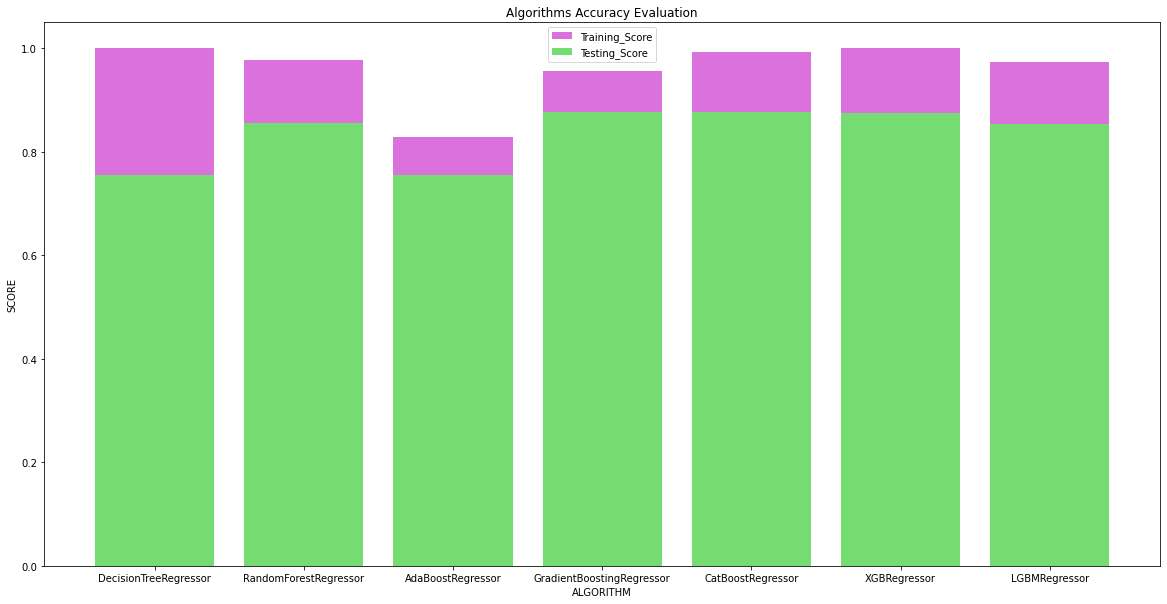

In [527]:
plt.figure(figsize=(20,10))
plt.title('Algorithms Accuracy Evaluation')
plt.xlabel("ALGORITHM")
plt.ylabel("SCORE")
plt.bar(df['Algorithms'],df['Training Score'],color='#DA71DC',label='Training_Score',data=df)
plt.bar(df['Algorithms'],df['Testing Score'],color='#74DC71',label='Testing_Score',data=df)
plt.legend();

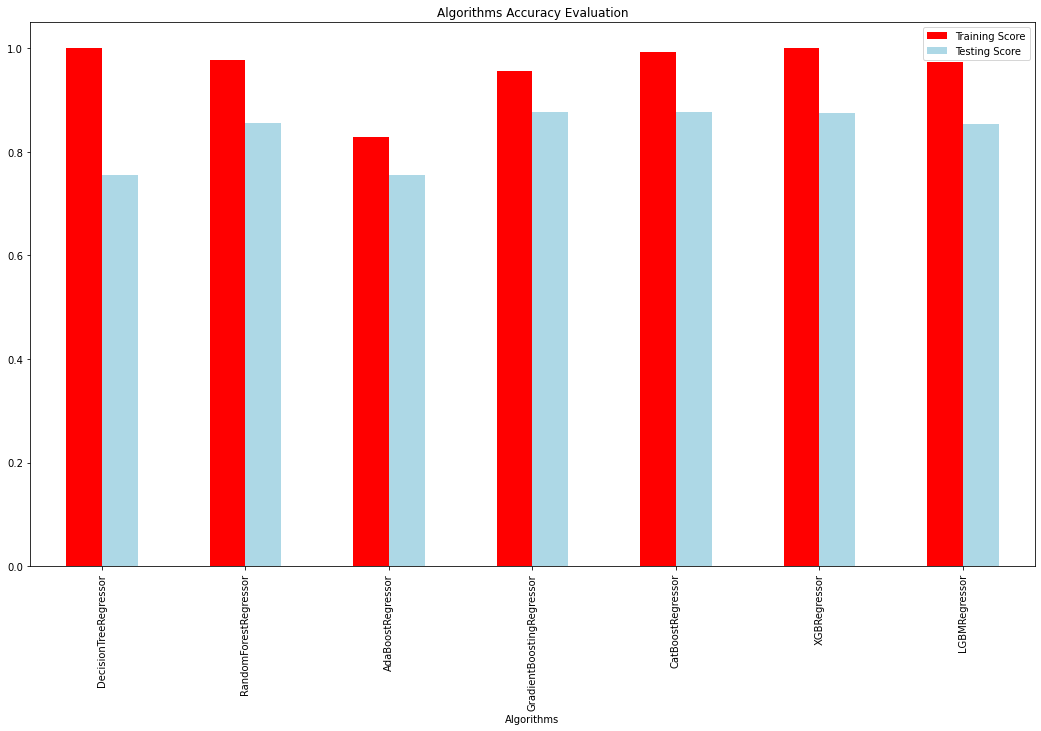

In [528]:
df.plot(x='Algorithms',y=['Training Score','Testing Score'],kind="bar",color=['red','lightblue'],title='Algorithms Accuracy Evaluation',figsize=(18,10));

# As you can see CatBoostRegressor is having highest r2_score and having highest accuracy 

# Now We can perform HYPERPARAMETER TUNNING FOR GradientBoostingRegressor()

In [537]:
GBR=GradientBoostingRegressor()

In [538]:
grid_param = {
    'n_estimators': [10,50,100,500,200],
    'learning_rate' : [0.0001,0.01,0.001,1.0]}

In [539]:
grid_search = GridSearchCV(estimator=GBR,
                     param_grid=grid_param,
                    n_jobs =-1,cv=10,scoring="r2") 

In [541]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 50, 100, 500, 200]},
             scoring='r2')

In [544]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)

 The best score across ALL searched params:
 0.8368505173702785

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'n_estimators': 500}


In [580]:
GBR= GradientBoostingRegressor(verbose=False)

In [581]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor(verbose=False)

In [582]:
y_pred = GBR.predict(x_test)
y_pred_train = GBR.predict(x_train)

In [583]:
r2_score(y_pred,y_test)

0.8723247055529731

In [584]:
r2_score(y_pred_train,y_train)

0.9555139230300828

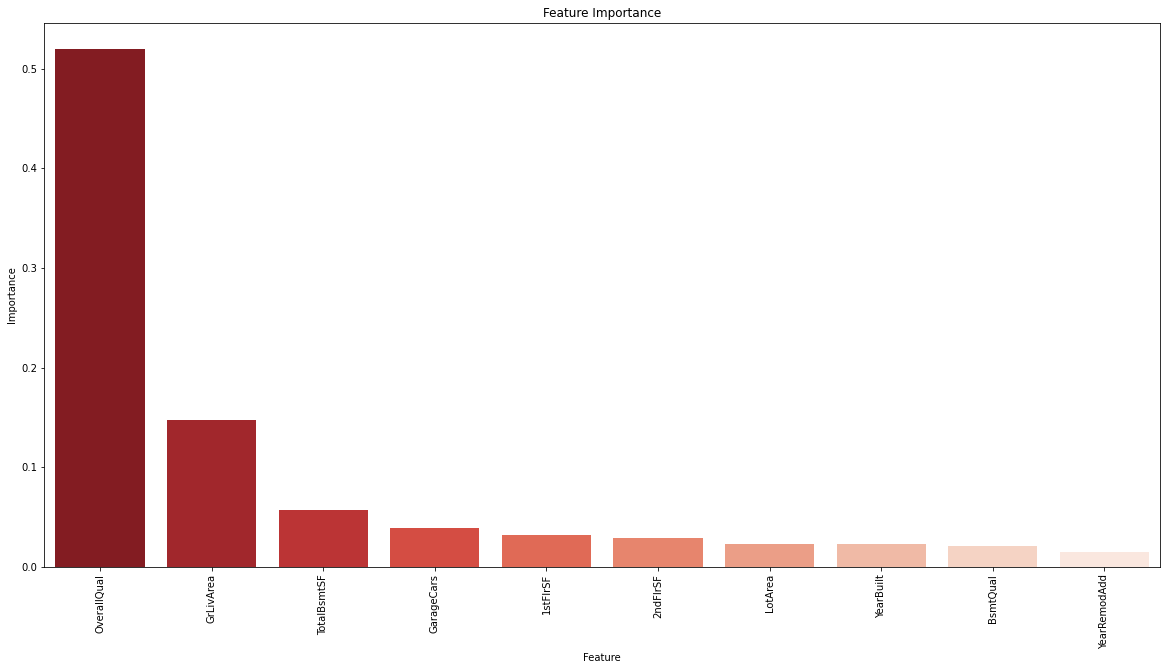

In [587]:
# Calculate the feature importances
importances = GBR.feature_importances_

# Sort the feature importances in descending order and take the top 10
indices = np.argsort(importances)[::-1]
columns = x_train.columns.values[indices[:10]]
values = importances[indices][:10]

# Create a bar plot of the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(x=columns, y=values, palette='Reds_r')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Now We can perform HYPERPARAMETER TUNNING FOR CatBoostRegressor()

In [579]:
CBR=CatBoostRegressor()

In [530]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [543]:
grid = GridSearchCV(estimator=CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)

In [534]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8506150623211546

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


# Calculate the feature importances for CATBOOSTREGRESSOR() model

In [573]:
CBR= CatBoostRegressor(verbose=False)

In [574]:
CBR.fit(x_train,y_train)

In [575]:
y_pred = CBR.predict(x_test)
y_pred_train = CBR.predict(x_train)

In [576]:
r2_score(y_pred,y_test)

0.8771688936856052

In [577]:
r2_score(y_pred_train,y_train)

0.9928619491452245

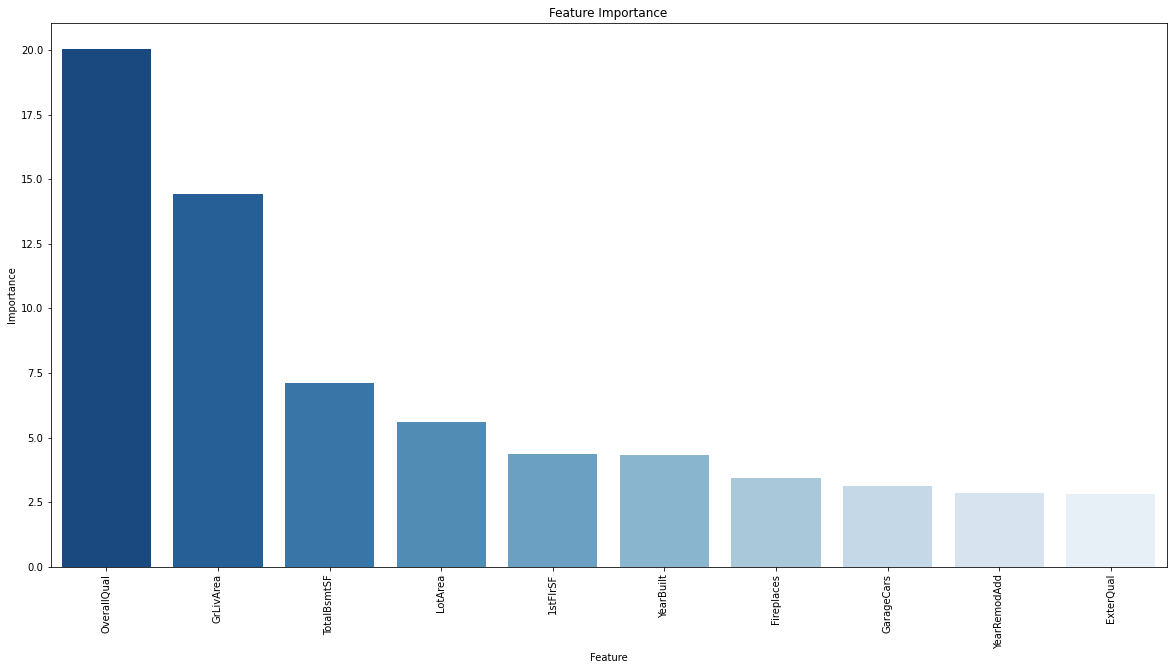

In [578]:
# Calculate the feature importances
importances = CBR.feature_importances_

# Sort the feature importances in descending order and take the top 10
indices = np.argsort(importances)[::-1]
columns = x_train.columns.values[indices[:10]]
values = importances[indices][:10]

# Create a bar plot of the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(x=columns, y=values, palette='Blues_r')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# CONCLUSION

# üìù Key Findings:

Features like `OverallQual`,`GrLivArea`,'TotalBsmtSF', and `GarageArea` are having strong relation with the target variable.

The best performing model is CatBoostRegressor with highest R2 & Adjusted_R2 Scores and lowest MAE,MSE,RMSE values.

The second & third best performing model is GradientBoostingRegressor & LGBMRegressor models.

The project developed a house price prediction model with strong performance metrics.

The project effectively addresses the task of house price prediction and contributes as a valuable tool in the dynamic real estate industry.